# Paper Health impacts of air pollution exposure from 1990 to 2019 in 35 Lat countries 


In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import os
import pandas as pd
# ubicacion de los archivos
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import scipy.stats as st 
import warnings
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings("ignore")
print("librerias ok")



librerias ok


In [2]:
#Directorio
os.chdir("D:/Josefina/Proyectos/Seba/health_impact/data")
data = pd.read_csv("LAT.csv")
#data
# Leemos info sobre "Population-Weighted Concentration" https://www.stateofglobalair.org/data/#/air/table
data_pm = pd.read_csv("LAT_PM25.csv")
#data_pm

In [3]:
# Funcion para filtrar los datos de las columnas
def filtrado (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] == Cause)  & (data['Year'] == Year)]
    return df_filtrado
def filtrado_2 (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] != Cause)  & (data['Year'] == Year)]
    return df_filtrado

def filtrado_3 (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] != Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] == Cause)  & (data['Year'] == Year)]
    return df_filtrado

prueba_filtro = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "70+ years", Sex="Both sexes", Year=2019)
len(prueba_filtro)

35

# Overall change of air quality parameters and morbidity and mortality estimates attributable to air pollution in LatAm from 1990 to 2019. 

In [4]:
# Exposición promedio de aPM2.5 (PM2.5 ambiente) de los países Latinoamericanos
# Supplementary Table S1
data_pm_2019 = data_pm[data_pm['Year'] == 2019]
data_pm_1990 = data_pm[data_pm['Year'] == 1990]
supp_tabla1 = pd.merge(data_pm_1990, data_pm_2019, on='Country', how='inner')
supp_tabla1 = supp_tabla1.rename(columns={'Exposure Mean_x':"Exposure Mean 1990", 'Exposure Mean_y':"Exposure Mean 2019"})
supp_tabla1_sub = supp_tabla1[["Country","Exposure Mean 1990","Exposure Mean 2019"]]
supp_tabla1_sub["difference"] = round(((supp_tabla1_sub["Exposure Mean 2019"] - supp_tabla1_sub["Exposure Mean 1990"])/supp_tabla1_sub["Exposure Mean 1990"])*100,1)

supp_tabla1_sub = supp_tabla1_sub.sort_values(by='Country')

### Media
media_lat_2019 = data_pm_2019["Exposure Mean"].mean()
media_lat_1990 = data_pm_1990["Exposure Mean"].mean()

# crear un intervalo de confianza del 95% 
CI_2019 = st.t.interval (alpha = 0.95, df = len (data_pm_2019) -1, loc = np.mean (data_pm_2019['Exposure Mean']), scale = st.sem (data_pm_2019['Exposure Mean']))
CI_1990 = st.t.interval (alpha = 0.95, df = len (data_pm_1990) -1, loc = np.mean (data_pm_1990['Exposure Mean']), scale = st.sem (data_pm_1990['Exposure Mean']))

print("La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de",round(media_lat_1990,2),"μg/m3 (IC del 95%:", round(CI_1990[0],2),"-", round(CI_1990[1],2), ") en 1990")
#mientras que en 2019 fue un 13.4% más baja, alcanzando los 18.49μg/m3 (IC del 95%: 16.3–20.3).")
print("La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de",round(media_lat_2019,2),"μg/m3 (IC del 95%:", round(CI_2019[0],2),"-", round(CI_2019[1],2), ") en 2019")
print("Es decir, ", round(((media_lat_2019-media_lat_1990)/media_lat_1990)*100,2), "% mas baja")
supp_tabla1_sub
# Paises que redujeron y que aumentaron su concentración anual ponderada por la población de partículas finas (aPM2.5)
paises_reduccion = supp_tabla1_sub[supp_tabla1_sub['difference']<0]
paises_aumentaron = supp_tabla1_sub[supp_tabla1_sub['difference'] > 0]
print("Paises que redujeron las concentraciones: ",len(paises_reduccion))
print("Paises que aumentaron las concentraciones: ",len(paises_aumentaron))

La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de 21.49 μg/m3 (IC del 95%: 18.46 - 24.52 ) en 1990
La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de 18.54 μg/m3 (IC del 95%: 16.64 - 20.45 ) en 2019
Es decir,  -13.71 % mas baja
Paises que redujeron las concentraciones:  27
Paises que aumentaron las concentraciones:  8


* La exposición promedio de aPM2.5 fue de 21.49 μg/m3 (IC del 95%: 18.46 - 24.52) en 1990, mientras que en 2019 fue un 13.71% más baja,  alcanzando los 18.54 μg/m3 (IC del 95%: 16.64 - 20.45). 
* 27 de los 35 paises redujeron su concentración anual ponderada por la población de partículas finas (aPM2.5)

* Segun el paper de referencia, los paises europeos la exposición promedio aPM2.5  fue de 20.8 μg/m3 (IC del 95%: 18.3–23.2) en 1990, mientras que en 2019 fue un 33.7% más baja, alcanzando los 13.8 μg/m3 (IC del 95%: 12.0–15.6).

In [5]:
# Analisis del numero de muertes
num_death_airPol_allCause_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
num_death_airPol_allCause_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=1990)
diferencia_num_death_airPol_allCause = num_death_airPol_allCause_1990
sum_num_death_airPol_allCause_1990 = round(num_death_airPol_allCause_1990['Value'].sum(),0)
sum_num_death_airPol_allCause_2019 = round(num_death_airPol_allCause_2019['Value'].sum(),0)
dif_num_death_airPol = round(((sum_num_death_airPol_allCause_1990-sum_num_death_airPol_allCause_2019)/sum_num_death_airPol_allCause_1990)*100,2)

print("Hubo un total de ",sum_num_death_airPol_allCause_1990,"muertes en Latinoamérica atribuibles a la contaminación del aire 1990")
print("Hubo un total de ",sum_num_death_airPol_allCause_2019,"muertes en Latinoamérica atribuibles a la contaminación del aire 2019")
print("Con una reducción ",(sum_num_death_airPol_allCause_1990-sum_num_death_airPol_allCause_2019),"muertes (",dif_num_death_airPol,"%)")

# Union de las tablas de 1990 - 2019 para ser comparadas
num_death_airPol_allCause_1990_sub = num_death_airPol_allCause_1990[["Location","Value"]]

num_death_airPol_allCause_2019_sub = num_death_airPol_allCause_2019[["Location","Value"]]
num_death_air_pol_merge = pd.merge(num_death_airPol_allCause_1990_sub, num_death_airPol_allCause_2019_sub, on='Location', how='inner')

num_death_air_pol_merge = num_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
num_death_air_pol_merge['difference']  = num_death_air_pol_merge['value_1990'] - num_death_air_pol_merge['value_2019']
num_death_air_pol_merge['difference_porc']  = round((((num_death_air_pol_merge['value_1990'] - num_death_air_pol_merge['value_2019'])/num_death_air_pol_merge['value_1990'] )*100),2)
# Paises que redujeron y que aumentaron su concentración anual ponderada por la población de partículas finas (aPM2.5)
paises_reduccion_muertes = num_death_air_pol_merge[num_death_air_pol_merge['difference_porc']>0]
paises_aumentaron_muertes = num_death_air_pol_merge[num_death_air_pol_merge['difference_porc'] < 0]
print("Paises que redujeron las muertes asociadas con la contaminacion atmosferica: ",len(paises_reduccion_muertes))
print("Paises que aumentaron las muertes asociadas con la contaminacion atmosferica: ",len(paises_aumentaron_muertes))
# Pais con mayor disminucion de muertes ordenar de mayor a menor. 
# Los positivps son los que mas disminuyeron, los paises con valores negativos son aquellos que aumentaron el numero de muertes
num_death_air_pol_merge = num_death_air_pol_merge.sort_values(by='difference_porc',ascending=False)

paises_reduccion = num_death_air_pol_merge.iloc[:4]
paises_aumento = num_death_air_pol_merge.iloc[-2:]
print("Paises que redujeron la mortalidad")
print(paises_reduccion)
print("-------------------------------------------------------------------")
print("Paises que aumentaron la mortalidad")
print(paises_aumento)

num_death_air_pol_merge

Hubo un total de  244306.0 muertes en Latinoamérica atribuibles a la contaminación del aire 1990
Hubo un total de  234024.0 muertes en Latinoamérica atribuibles a la contaminación del aire 2019
Con una reducción  10282.0 muertes ( 4.21 %)
Paises que redujeron las muertes asociadas con la contaminacion atmosferica:  15
Paises que aumentaron las muertes asociadas con la contaminacion atmosferica:  20
Paises que redujeron la mortalidad
                 Location  value_1990  value_2019  difference  difference_porc
16                Bermuda   22.201592    9.618290   12.583302            56.68
21  Saint Kitts and Nevis   22.528942   11.725836   10.803106            47.95
31               Dominica   60.934218   36.969935   23.964283            39.33
33                Grenada   85.552233   53.969736   31.582497            36.92
-------------------------------------------------------------------
Paises que aumentaron la mortalidad
                              Location   value_1990   value_2019

,Location,value_1990,value_2019,difference,difference_porc
16,Bermuda,22.201592,9.618290,12.583302,56.68
21,Saint Kitts and Nevis,22.528942,11.725836,10.803106,47.95
31,Dominica,60.934218,36.969935,23.964283,39.33
33,Grenada,85.552233,53.969736,31.582497,36.92
23,Uruguay,1297.379245,819.838199,477.541046,36.81
20,Brazil,86652.656820,60914.604200,25738.052620,29.70
12,Peru,15697.823810,11413.773550,4284.050260,27.29
15,El Salvador,3439.779395,2574.031951,865.747444,25.17
9,Bolivia (Plurinational State of),8055.244160,6254.744838,1800.499322,22.35
5,Guyana,596.571379,466.153309,130.418070,21.86


In [16]:

num_death_air_pol_merge_SDI = pd.merge(num_death_air_pol_merge, num_death_airPol_allCause_2019, on='Location', how='inner')
num_death_air_pol_merge_SDI.columns
num_death_air_pol_merge_SDI = num_death_air_pol_merge_SDI[['Location', 'value_1990', 'value_2019', 'difference', 'difference_porc',
       'SDI_1990', 'SDI_2019', 'categoria_SDI_2018',
       'GNI_1990', 'GNI_2019', 'Clasification']]
num_death_air_pol_merge_SDI

,Location,value_1990,value_2019,difference,difference_porc,SDI_1990,SDI_2019,categoria_SDI_2018,GNI_1990,GNI_2019,Clasification
0,Bermuda,22.201592,9.618290,12.583302,56.68,0.685,0.813,medium,NaN,117280.0,uppermiddle
1,Saint Kitts and Nevis,22.528942,11.725836,10.803106,47.95,0.583,0.746,low,5170.0,23450.0,high-income
2,Dominica,60.934218,36.969935,23.964283,39.33,0.579,0.729,low,2850.0,8240.0,uppermiddle
3,Grenada,85.552233,53.969736,31.582497,36.92,0.463,0.669,low,2760.0,8900.0,uppermiddle
4,Uruguay,1297.379245,819.838199,477.541046,36.81,0.581,0.697,low,2840.0,18170.0,high-income
5,Brazil,86652.656820,60914.604200,25738.052620,29.70,0.487,0.640,low,4310.0,9220.0,uppermiddle
6,Peru,15697.823810,11413.773550,4284.050260,27.29,0.501,0.648,low,840.0,6770.0,high-income
7,El Salvador,3439.779395,2574.031951,865.747444,25.17,0.390,0.573,low,880.0,4090.0,uppermiddle
8,Bolivia (Plurinational State of),8055.244160,6254.744838,1800.499322,22.35,0.412,0.566,low,700.0,3440.0,uppermiddle
9,Guyana,596.571379,466.153309,130.418070,21.86,0.452,0.618,low,390.0,6500.0,uppermiddle


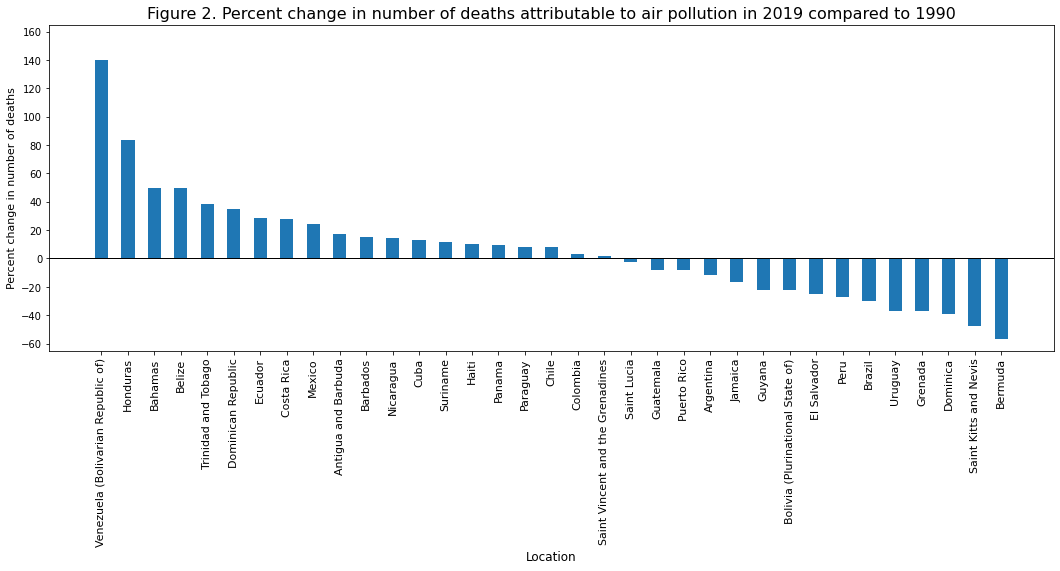

In [58]:
# Figure 2. Percent change in number of deaths attributable to air pollution in 2019 compared to 1990.
# Filtramos los datos de numeros de muertes atribuible solo a la contaminacion atmosferica tanto para el año 1990 como para 2019
#Año 1990
num_death_air_pol_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=1990)
# Europa len = 35
#len(num_death_air_pol_1990)
#Año 2019
num_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)

# Europa len = 43
#len(num_death_air_pol_2019)

# Union de las tablas de 1990 - 2019 para ser comparadas
num_death_air_pol_merge = pd.merge(num_death_air_pol_1990, num_death_air_pol_2019, on='Location', how='inner')
#print(num_death_air_pol_merge)
# Cambiamos el nombre de las columnas
#print(num_death_air_pol_merge.columns)
num_death_air_pol_merge = num_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Calculamos el % de cambio
num_death_air_pol_merge['percent_change'] = ((num_death_air_pol_merge['value_2019'] - num_death_air_pol_merge['value_1990']) / num_death_air_pol_merge['value_1990']) *100

#Generamos un df nuevo y solo nos quedamos con las columnas del nombre de los paises y el % de cambio calculado
percent_change_num_death = num_death_air_pol_merge[['Location', 'percent_change']]
# Ordenamos de mayor a menor como esta en el paer
percent_change_num_death = percent_change_num_death.sort_values(by='percent_change',ascending=False)
#print(percent_change_num_death)

# Generamos Gráfico de barras
plt.figure(figsize=(18, 6))
plt.bar(x = percent_change_num_death['Location'], height = percent_change_num_death["percent_change"], width=0.5)
plt.ylim(-65, 165)
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(range(-60, 170,20))
# Agregar etiquetas a los ejes
plt.xlabel('Location', fontsize=12)  # Etiqueta del eje x
plt.ylabel('Percent change in number of deaths', fontsize=11)  # Etiqueta del eje y

# Agregar título
plt.title('Figure 2. Percent change in number of deaths attributable to air pollution in 2019 compared to 1990', fontsize=16)

# Mostrar el gráfico
plt.show()

* Hubo un total de 234,024 muertes en Latinoamérica atribuibles a la contaminación del aire 2019, con una reducción de 10281 muertes (4.21%) en comparación con 199
* 15 países disminuyeron su número de muertes (Figura 2), mientras que 20 países aumentaron el número de muertes. 
* Bermuda tuvo la reducción más significativa en la mortalidad atribuible a la contaminación del aire, con una disminución del 56.68% en 2019 en comparación con 1990. 
* Le siguen Saint Kitts and Nevis, Dominica y Grenada con un 47.95%,  un 39.33%, y 36.92%  menos de muertes, respectivamente.
* Venezuela y Honduras los principales aumentos 139.8% y 83.4%. 
* Argentina (11.4%), Bolivia (22.3%) y Brasil (29.7%) tuvieron una reducción, mientras que  Colombia (3.5%), Chile (7.9%) y México ( 24.26%) aumentaron.

In [6]:
# # Analisis del numero de la tasa de mortalidad
rate_death_air_pol_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
rate_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # Union de las tablas de 1990 - 2019 para ser comparadas
rate_death_air_pol_2019_sub =rate_death_air_pol_2019[["Location","Value"]]
rate_death_air_pol_1990_sub = rate_death_air_pol_1990[["Location","Value"]]
rate_death_air_pol_merge = pd.merge(rate_death_air_pol_1990_sub, rate_death_air_pol_2019_sub, on='Location', how='inner')
#Cambio de nombres de las columnas
rate_death_air_pol_merge = rate_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Diferencia
rate_death_air_pol_merge['difference']  = rate_death_air_pol_merge['value_1990'] - rate_death_air_pol_merge['value_2019']
# Diferencia porcentual
rate_death_air_pol_merge['difference_porc']  = round((((rate_death_air_pol_merge['value_1990'] - rate_death_air_pol_merge['value_2019'])/rate_death_air_pol_merge['value_1990'] )*100),2)
rate_death_air_pol_merge

suma_rate_death_air_pol_1990 = rate_death_air_pol_merge['value_1990'].median()
suma_rate_death_air_pol_2019 = rate_death_air_pol_merge['value_2019'].median()

print("Tasa de mortalidad atribuible a la contaminacion 1990 es ",round(suma_rate_death_air_pol_1990,2))
print("Tasa de mortalidad atribuible a la contaminacion 2019 es ",round(suma_rate_death_air_pol_2019,2))
print("La diferencia de Tasa de mortalidad atribuible a la contaminacion entre 1900-2019 es ",round(((suma_rate_death_air_pol_1990 - suma_rate_death_air_pol_2019)/suma_rate_death_air_pol_1990)*100,2))

print(" ------------------------------------------------------------------------- ")
### TODAS LAS CAUSAS
rate_death_all_risk_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'All risk factors', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
rate_death_all_risk_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'All risk factors', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # Union de las tablas de 1990 - 2019 para ser comparadas
rate_death_all_risk_2019_sub =rate_death_all_risk_2019[["Location","Value"]]
rate_death_all_risk_1990_sub = rate_death_all_risk_1990[["Location","Value"]]
rate_death_all_risk_merge = pd.merge(rate_death_all_risk_1990_sub, rate_death_all_risk_2019_sub, on='Location', how='inner')
#Cambio de nombres de las columnas
rate_death_all_risk_merge = rate_death_all_risk_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Diferencia
rate_death_all_risk_merge['difference']  = rate_death_all_risk_merge['value_1990'] - rate_death_air_pol_merge['value_2019']
# Diferencia porcentual
rate_death_all_risk_merge['difference_porc']  = round((((rate_death_all_risk_merge['value_1990'] - rate_death_all_risk_merge['value_2019'])/rate_death_air_pol_merge['value_1990'] )*100),2)
rate_death_all_risk_merge

suma_rate_death_all_risk_1990 = rate_death_all_risk_merge['value_1990'].median()
suma_rate_death_all_risk_2019 = rate_death_all_risk_merge['value_2019'].median()

print("Tasa de mortalidad de todas las causas en 1990 es ",round(suma_rate_death_all_risk_1990,2))
print("Tasa de mortalidad de todas las causas  en 2019 es ",round(suma_rate_death_all_risk_2019,2))
print("La diferencia de Tasa de mortalidad de todas las causas entre 1900-2019 es ",round(((suma_rate_death_all_risk_1990 - suma_rate_death_all_risk_2019)/suma_rate_death_all_risk_1990)*100,2))
print("La mediana es de:", suma_rate_death_air_pol_2019)


Tasa de mortalidad atribuible a la contaminacion 1990 es  80.4
Tasa de mortalidad atribuible a la contaminacion 2019 es  41.52
La diferencia de Tasa de mortalidad atribuible a la contaminacion entre 1900-2019 es  48.36
 ------------------------------------------------------------------------- 
Tasa de mortalidad de todas las causas en 1990 es  499.26
Tasa de mortalidad de todas las causas  en 2019 es  403.77
La diferencia de Tasa de mortalidad de todas las causas entre 1900-2019 es  19.13
La mediana es de: 41.51552732


In [17]:
paises_superan_media = rate_death_air_pol_2019[rate_death_air_pol_2019['Value'] > suma_rate_death_air_pol_2019]
print(len(paises_superan_media))
paises_superan_media_subs = paises_superan_media[['Location','Value']]
paises_superan_media_subs['porc'] = paises_superan_media['Value'] / suma_rate_death_air_pol_2019
paises_superan_media_subs  = paises_superan_media_subs.sort_values(by='porc',ascending=True)
paises_superan_media_subs

17


,Location,Value,porc
9845,Saint Lucia,41.984206,1.011289
9220,Dominica,41.988417,1.011391
13694,Paraguay,42.553844,1.025010
7242,Mexico,43.914209,1.057778
3594,Venezuela (Bolivarian Republic of),45.010474,1.084184
8052,Belize,47.243371,1.137969
14243,Trinidad and Tobago,49.941249,1.202954
13577,Dominican Republic,52.108389,1.255154
14606,Saint Vincent and the Grenadines,52.865407,1.273389
5413,Grenada,53.421739,1.286789


In [9]:
# # Analisis del numero de la tasa de mortalidad
rate_death_air_pol_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Cause = "All causes", Risk= "Ambient particulate matter pollution", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
rate_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Cause = "All causes", Risk= "Ambient particulate matter pollution", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # Union de las tablas de 1990 - 2019 para ser comparadas
rate_death_air_pol_2019_sub =rate_death_air_pol_2019[["Location","Value"]]
rate_death_air_pol_1990_sub = rate_death_air_pol_1990[["Location","Value"]]
rate_death_air_pol_merge = pd.merge(rate_death_air_pol_1990_sub, rate_death_air_pol_2019_sub, on='Location', how='inner')
#Cambio de nombres de las columnas
rate_death_air_pol_merge = rate_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Diferencia
rate_death_air_pol_merge['difference']  = rate_death_air_pol_merge['value_1990'] - rate_death_air_pol_merge['value_2019']
# Diferencia porcentual
rate_death_air_pol_merge['difference_porc']  = round((((rate_death_air_pol_merge['value_1990'] - rate_death_air_pol_merge['value_2019'])/rate_death_air_pol_merge['value_1990'] )*100),2)
rate_death_air_pol_merge

suma_rate_death_air_pol_1990 = rate_death_air_pol_merge['value_1990'].median()
suma_rate_death_air_pol_2019 = rate_death_air_pol_merge['value_2019'].median()

print("Tasa de mortalidad atribuible a la contaminacion de aPM 1990 es ",round(suma_rate_death_air_pol_1990,2))
print("Tasa de mortalidad atribuible a la contaminacion de aPM 2019 es ",round(suma_rate_death_air_pol_2019,2))
print("La diferencia de Tasa de mortalidad atribuible a la contaminacion de aPM entre 1900-2019 es ",round(((suma_rate_death_air_pol_1990 - suma_rate_death_air_pol_2019)/suma_rate_death_air_pol_1990)*100,2))

print(" ------------------------------------------------------------------------- ")
print("La diferencia de Tasa de mortalidad de todas las causas entre 1900-2019 es ",round(((suma_rate_death_all_risk_1990 - suma_rate_death_all_risk_2019)/suma_rate_death_all_risk_1990)*100,2))


Tasa de mortalidad atribuible a la contaminacion de aPM 1990 es  34.16
Tasa de mortalidad atribuible a la contaminacion de aPM 2019 es  30.72
La diferencia de Tasa de mortalidad atribuible a la contaminacion de aPM entre 1900-2019 es  10.08
 ------------------------------------------------------------------------- 
La diferencia de Tasa de mortalidad de todas las causas entre 1900-2019 es  19.13


* Durante el período de 29 años, también se observa una tendencia decreciente en la tasa de mortalidad mediana por todas las causas de todos los países Latinoamericanos, con una reducción total del 19.13% (499.23 en 1990 y  403.77).

* La reducción de la tasa de mortalidad atribuible a la contaminación del aire fue más pronunciada en comparación con la tasa de mortalidad general. 

* Fue de 80.4% en 1990, mientras que en 2019 fue del 41.52%, lo que representa una disminución del 48.36%.  


# Figure 3

In [52]:
#Principales causas de muerte
num_death_air_pol_2019_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "Ischemic heart disease", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "Stroke", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_trl = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "Tracheal, bronchus, and lung cancer", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_all_causes = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_all_causes
porc_num_death_air_pol_2019_IHD = round(num_death_air_pol_2019_IHD['Value'].sum() / num_death_air_pol_2019_all_causes['Value'].sum()*100,2)
porc_num_death_air_pol_2019_stroke = round(num_death_air_pol_2019_stroke['Value'].sum() / num_death_air_pol_2019_all_causes['Value'].sum()*100,2)
porc_num_death_air_pol_2019_trl = round(num_death_air_pol_2019_trl['Value'].sum() / num_death_air_pol_2019_all_causes['Value'].sum()*100,2)

print("En Latinoamerica IHD tambien  fue la principal causa de muerte representando el", porc_num_death_air_pol_2019_IHD,"%")
print("En Latinoamerica stroke tambien  fue la principal causa de muerte representando el", porc_num_death_air_pol_2019_stroke,"%")
print("En Latinoamerica trl tambien  fue la principal causa de muerte representando el", porc_num_death_air_pol_2019_trl,"%")

#Principales riesgo de muerte
num_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_ozone = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_aPM25 = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_all_household = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)

num_death_air_pol_2019_ozone = round(num_death_air_pol_2019_ozone['Value'].sum() / num_death_air_pol_2019['Value'].sum()*100,2)
num_death_air_pol_2019_aPM25 = round(num_death_air_pol_2019_aPM25['Value'].sum() / num_death_air_pol_2019['Value'].sum()*100,2)
num_death_air_pol_2019_all_household = round(num_death_air_pol_2019_all_household['Value'].sum() / num_death_air_pol_2019['Value'].sum()*100,2)


print("Ozono", num_death_air_pol_2019_ozone,"%")
print("PM25 ambiental", num_death_air_pol_2019_aPM25,"%")
print("Household air pollution from solid fuels", num_death_air_pol_2019_all_household,"%")

En Latinoamerica IHD tambien  fue la principal causa de muerte representando el 31.14 %
En Latinoamerica stroke tambien  fue la principal causa de muerte representando el 20.33 %
En Latinoamerica trl tambien  fue la principal causa de muerte representando el 5.62 %
Ozono 3.42 %
PM25 ambiental 71.71 %
Household air pollution from solid fuels 25.34 %


En Latinoamerica IHD tambien  fue la principal causa de muerte representando el 31.14% de todas las muertes atribuibles a la contaminación del aire. El accidente cerebrovascular y el cáncer de pulmón tuvieron una contribución menor al número total de muertes, con un 20.33% y un 5.62%, respectivamente. Al analizar los parámetros de la contaminación del aire, la mayoría (71.71%) de todas las muertes estuvieron asociadas con la contaminación por aPM2.5, ozono (3.42%) y Household air pollution from solid fuels( 25.34 %). Por lo tanto, debido a la alta proporción en el número total de muertes entre todos los contaminantes atmosféricos, nos centramos principalmente en analizar los efectos de aPM2.5 en la salud.


# Tabla 1

In [14]:
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
num_death_airPol_allCause_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=1990)

print("Deaths (thousands) - All causes - Air pollution 1990 = ",num_death_airPol_allCause_1990['Value'].sum())

##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")

Deaths (thousands) - All causes - Air pollution =  234.0
Deaths (thousands) - All causes - Air pollution 1990 =  244305.82971815002
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  41.5 ( 24.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  1105.8 ( 603.4 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  167.8
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  30.7 ( 14.6 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  788.3 ( 486.6 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  59.3
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  3.7 ( 8.5 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  121.6 ( 239.9 )
-------------------------------------------------------
Deaths (thousands) - 

In [12]:

#causa = "All causes"
causa = "Ischemic heart disease"
## --------  Air pollution
num_death_airPol_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - IHD - Air pollution = ",round(num_death_airPol_IHD['Value'].sum()/1000,1))
##
rate_death_airPol_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
# Calcular el IQR
IQR_rate_death_airPol_IHD = round(np.percentile(rate_death_airPol_IHD['Value'], 75) - np.percentile(rate_death_airPol_IHD['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - IHD - Air pollution = ",round(rate_death_airPol_IHD['Value'].median(),1),"(",IQR_rate_death_airPol_IHD,")")

#######
rate_DALYs_airPol_IHD = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_IHD = round(np.percentile(rate_DALYs_airPol_IHD['Value'], 75) - np.percentile(rate_DALYs_airPol_IHD['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - IHD - Air pollution = ",round(rate_DALYs_airPol_IHD['Value'].median(),1),"(",IQR_rate_DALYs_airPol_IHD,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause= causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - IHD - aPM2.5 = ",round(num_death_apm25_IHD['Value'].sum()/1000,1))
##
rate_death_apm25_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)

IQR_rate_death_apm25_IHD= round(np.percentile(rate_death_apm25_IHD['Value'], 75) - np.percentile(rate_death_apm25_IHD['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - IHD - aPM2.5 = ",round(rate_death_apm25_IHD['Value'].median(),1),"(",IQR_rate_death_apm25_IHD,")")
##
rate_DALYs_apm25_IHD = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_IHD = round(np.percentile(rate_DALYs_apm25_IHD['Value'], 75) - np.percentile(rate_DALYs_apm25_IHD['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - IHD - aPM2.5 = ",round(rate_DALYs_apm25_IHD['Value'].median(),1),"(",IQR_DALYs_apm25_IHD,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - IHD - Household = ",round(num_death_household_IHD['Value'].sum()/1000,1))

# ##
rate_death_household_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_IHD  = round(np.percentile(rate_death_household_IHD['Value'], 75) - np.percentile(rate_death_household_IHD['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - IHD - Household = ",round(rate_death_household_IHD['Value'].median(),1),"(",IQR_death_household_IHD,")")
##
rate_DALYs_household_IHD = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_IHD  = round(np.percentile(rate_DALYs_household_IHD['Value'], 75) - np.percentile(rate_DALYs_household_IHD['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - IHD- Household = ",round(rate_DALYs_household_IHD['Value'].median(),1),"(",IQR_DALYs_household_IHD,")")
print("-------------------------------------------------------")




Deaths (thousands) - IHD - Air pollution =  72.9
Median age standardised death rate per 100,000 (IQR) - IHD - Air pollution =  11.2 ( 9.0 )
Median age standardised DALYs rate per 100,000 (IQR) - IHD - Air pollution =  241.4 ( 206.7 )
-------------------------------------------------------
Deaths (thousands) - IHD - aPM2.5 =  55.7
Median age standardised death rate per 100,000 (IQR) - IHD - aPM2.5 =  9.5 ( 5.2 )
Median age standardised DALYs rate per 100,000 (IQR) - IHD - aPM2.5 =  196.5 ( 103.1 )
-------------------------------------------------------
Deaths (thousands) - IHD - Household =  17.2
Median age standardised death rate per 100,000 (IQR) - IHD - Household =  1.1 ( 2.8 )
Median age standardised DALYs rate per 100,000 (IQR) - IHD- Household =  23.1 ( 64.9 )
-------------------------------------------------------


In [8]:
print(" --------------------- AIR POLLUTION  ---------------------")
causa = "Stroke"
## --------  Air pollution
num_death_airPol_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Stroke - Air pollution = ",round(num_death_airPol_Stroke['Value'].sum()/1000,1))
##
rate_death_airPol_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
# Calcular el IQR
IQR_rate_death_airPol_Stroke = round(np.percentile(rate_death_airPol_Stroke['Value'], 75) - np.percentile(rate_death_airPol_Stroke['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - Stroke - Air pollution = ",round(rate_death_airPol_Stroke['Value'].median(),1),"(",IQR_rate_death_airPol_Stroke,")")

#######
rate_DALYs_airPol_Stroke = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_Stroke = round(np.percentile(rate_DALYs_airPol_Stroke['Value'], 75) - np.percentile(rate_DALYs_airPol_Stroke['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - Stroke - Air pollution = ",round(rate_DALYs_airPol_Stroke['Value'].median(),1),"(",IQR_rate_DALYs_airPol_Stroke,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Stroke - aPM2.5 = ",round(num_death_apm25_Stroke['Value'].sum()/1000,1))
##
rate_death_apm25_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)

IQR_rate_death_apm25_Stroke = round(np.percentile(rate_death_apm25_Stroke['Value'], 75) - np.percentile(rate_death_apm25_Stroke['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - Stroke - aPM2.5 = ",round(rate_death_apm25_Stroke['Value'].median(),1),"(",IQR_rate_death_apm25_Stroke,")")
##
rate_DALYs_apm25_Stroke = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_Stroke = round(np.percentile(rate_DALYs_apm25_Stroke['Value'], 75) - np.percentile(rate_DALYs_apm25_Stroke['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - Stroke - aPM2.5 = ",round(rate_DALYs_apm25_Stroke['Value'].median(),1),"(",IQR_DALYs_apm25_Stroke,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Stroke - Household = ",round(num_death_household_Stroke['Value'].sum()/1000,1))

# ##
rate_death_household_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_Stroke  = round(np.percentile(rate_death_household_Stroke['Value'], 75) - np.percentile(rate_death_household_Stroke['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - Stroke - Household = ",round(rate_death_household_Stroke['Value'].median(),1),"(",IQR_death_household_Stroke,")")
##
rate_DALYs_household_Stroke = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_Stroke  = round(np.percentile(rate_DALYs_household_Stroke['Value'], 75) - np.percentile(rate_DALYs_household_Stroke['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - Stroke- Household = ",round(rate_DALYs_household_Stroke['Value'].median(),1),"(",IQR_DALYs_household_Stroke,")")
print("-------------------------------------------------------")



Deaths (thousands) - Stroke - Air pollution =  47.6
Median age standardised death rate per 100,000 (IQR) - Stroke - Air pollution =  9.1 ( 6.9 )
Median age standardised DALYs rate per 100,000 (IQR) - Stroke - Air pollution =  211.5 ( 141.6 )
-------------------------------------------------------
Deaths (thousands) - Stroke - aPM2.5 =  34.1
Median age standardised death rate per 100,000 (IQR) - Stroke - aPM2.5 =  6.6 ( 4.9 )
Median age standardised DALYs rate per 100,000 (IQR) - Stroke - aPM2.5 =  156.4 ( 104.6 )
-------------------------------------------------------
Deaths (thousands) - Stroke - Household =  13.5
Median age standardised death rate per 100,000 (IQR) - Stroke - Household =  0.9 ( 2.3 )
Median age standardised DALYs rate per 100,000 (IQR) - Stroke- Household =  20.4 ( 56.8 )
-------------------------------------------------------


In [11]:

causa = "Tracheal, bronchus, and lung cancer"
## --------  Air pollution
num_death_airPol_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - TRL - Air pollution = ",round(num_death_airPol_TRL['Value'].sum()/1000,1))
##
rate_death_airPol_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
# Calcular el IQR
IQR_rate_death_airPol_TRL = round(np.percentile(rate_death_airPol_TRL['Value'], 75) - np.percentile(rate_death_airPol_TRL['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - TRL - Air pollution = ",round(rate_death_airPol_TRL['Value'].median(),1),"(",IQR_rate_death_airPol_TRL,")")

#######
rate_DALYs_airPol_TRL = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_TRL = round(np.percentile(rate_DALYs_airPol_TRL['Value'], 75) - np.percentile(rate_DALYs_airPol_TRL['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - TRL - Air pollution = ",round(rate_DALYs_airPol_TRL['Value'].median(),1),"(",IQR_rate_DALYs_airPol_TRL,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - TRL - aPM2.5 = ",round(num_death_apm25_TRL['Value'].sum()/1000,1))
##
rate_death_apm25_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)

IQR_rate_death_apm25_TRL = round(np.percentile(rate_death_apm25_TRL['Value'], 75) - np.percentile(rate_death_apm25_TRL['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - TRL - aPM2.5 = ",round(rate_death_apm25_TRL['Value'].median(),1),"(",IQR_rate_death_apm25_TRL,")")
##
rate_DALYs_apm25_TRL = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_TRL = round(np.percentile(rate_DALYs_apm25_TRL['Value'], 75) - np.percentile(rate_DALYs_apm25_TRL['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - TRL - aPM2.5 = ",round(rate_DALYs_apm25_TRL['Value'].median(),1),"(",IQR_DALYs_apm25_TRL,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - TRL - Household = ",round(num_death_household_TRL['Value'].sum()/1000,1))

# ##
rate_death_household_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_TRL  = round(np.percentile(rate_death_household_TRL['Value'], 75) - np.percentile(rate_death_household_TRL['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - TRL - Household = ",round(rate_death_household_TRL['Value'].median(),1),"(",IQR_death_household_TRL,")")
##
rate_DALYs_household_TRL = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_TRL  = round(np.percentile(rate_DALYs_household_TRL['Value'], 75) - np.percentile(rate_DALYs_household_TRL['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - TRL- Household = ",round(rate_DALYs_household_TRL['Value'].median(),1),"(",IQR_DALYs_household_TRL,")")
print("-------------------------------------------------------")





Deaths (thousands) - TRL - Air pollution =  13.2
Median age standardised death rate per 100,000 (IQR) - TRL - Air pollution =  2.1 ( 0.9 )
Median age standardised DALYs rate per 100,000 (IQR) - TRL - Air pollution =  43.9 ( 23.9 )
-------------------------------------------------------
Deaths (thousands) - TRL - aPM2.5 =  10.6
Median age standardised death rate per 100,000 (IQR) - TRL - aPM2.5 =  1.5 ( 0.8 )
Median age standardised DALYs rate per 100,000 (IQR) - TRL - aPM2.5 =  36.4 ( 20.0 )
-------------------------------------------------------
Deaths (thousands) - TRL - Household =  2.5
Median age standardised death rate per 100,000 (IQR) - TRL - Household =  0.2 ( 0.3 )
Median age standardised DALYs rate per 100,000 (IQR) - TRL- Household =  3.6 ( 7.9 )
-------------------------------------------------------


In [61]:
causa = "All causes"
genero = "Female"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = "All ages", Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution - Female = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - Female = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - Female = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - Female = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 - Female = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household - Female = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - Female = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone - Female = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone - Female = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")


Deaths (thousands) - All causes - Air pollution - Female =  110.1
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - Female =  34.8 ( 20.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - Female =  951.9 ( 547.9 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  75.1
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - Female =  26.0 ( 14.4 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 - Female =  665.9 ( 438.8 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  31.9
Median age standardised death rate per 100,000 (IQR) - All causes - Household - Female =  4.0 ( 8.8 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - Female =  118.2 ( 240.8 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Househ

In [60]:
causa = "All causes"
genero = "Male"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = "All ages", Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution - Male= ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - Male = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - Male = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - Male = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household - Male = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household - Male = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - Male = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")


Deaths (thousands) - All causes - Air pollution - Male=  123.9
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - Male =  45.7 ( 26.2 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - Male =  1309.4 ( 701.0 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  92.7
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - Male =  35.1 ( 16.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  930.3 ( 476.8 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household - Male =  27.4
Median age standardised death rate per 100,000 (IQR) - All causes - Household - Male =  3.6 ( 8.1 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - Male =  124.6 ( 242.2 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  4.4
Med

In [59]:
causa = "All causes"
genero = "Both sexes"
edad =  "70+ years"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = edad, Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - 70+ years = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - 70+ years = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - 70+ years= ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 - 70+ years = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household - 70+ years = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - 70+ years = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age =edad, Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone - 70+ years = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone - 70+ years = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")



Deaths (thousands) - All causes - Air pollution =  128.9
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - 70+ years =  406.9 ( 169.1 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - 70+ years =  6211.6 ( 3047.3 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  93.7
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - 70+ years=  308.6 ( 156.6 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 - 70+ years =  4554.0 ( 2429.8 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  29.9
Median age standardised death rate per 100,000 (IQR) - All causes - Household - 70+ years =  39.0 ( 74.5 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - 70+ years =  736.6 ( 1222.2 )
-------------------------------------------------------
Deaths (thousand

In [18]:
causa = "All causes"
genero = "Both sexes"
edad =  "<5 years"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = edad, Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution - <5 years = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution - <5 years= ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution - <5 years= ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 - <5 years= ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 - <5 years = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household - <5 years= ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household - <5 years= ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age =edad, Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone - <5 years= ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone - <5 years = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")


Deaths (thousands) - All causes - Air pollution =  11.0
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  13.0 ( 14.2 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  1151.5 ( 1261.6 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  5.7
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  9.9 ( 7.3 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  879.6 ( 648.6 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  5.3
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  1.9 ( 4.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  165.8 ( 437.1 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  0.0
Median age standardised death rate per 100,000 (IQR) - 

In [62]:
# Supplementary Figure S3
#Años de vida perdidos por cada por cada 100,000 habitantes en Latinoamérica en 2019
yll_2019 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)
rate_yll_2019 = yll_2019['Value'].sum()
#len(yll_ihd)
print("Un total de",round(rate_yll_2019,0),"años de vida se perdieron por cada 100,000 habitantes en Latinoamérica en 2019 debido a condiciones de salud asociadas con la exposición a la contaminación del aire")
print("-------------------------------------------------------------------------")
###Años de vida perdidos por cada por cada 100,000 habitantes en Latinoamérica en 1990
yll_1990 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 1990)
rate_yll_1990 = yll_1990['Value'].sum()
#len(yll_ihd)
print("Un total de",round(rate_yll_1990,0),"años de vida se perdieron por cada 100,000 habitantes en Latinoamérica en 1990 debido a condiciones de salud asociadas con la exposición a la contaminación del aire")

print("-------------------------------------------------------------------------")
# Diferencia entre la tasa de 1990 - 2019
diferencia_rate_yll = round(((rate_yll_1990-rate_yll_2019)/rate_yll_1990)*100,2)
print("Esto representa una disminución del", diferencia_rate_yll,"% en 2019 en comparación con 1990")
print("-------------------------------------------------------------------------")
print("Years of life lost all countries")
#union de los dos dataset
yll_1990 = yll_1990[['Location', 'Value']]
yll_2019 = yll_2019[['Location', 'Value']]
rate_yll_merge = pd.merge(yll_1990, yll_2019, on='Location', how='inner')
rate_yll_merge = rate_yll_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
rate_yll_merge = rate_yll_merge.sort_values(by='value_2019',ascending=True)
rate_yll_merge

Un total de 37751.0 años de vida se perdieron por cada 100,000 habitantes en Latinoamérica en 2019 debido a condiciones de salud asociadas con la exposición a la contaminación del aire
-------------------------------------------------------------------------
Un total de 84701.0 años de vida se perdieron por cada 100,000 habitantes en Latinoamérica en 1990 debido a condiciones de salud asociadas con la exposición a la contaminación del aire
-------------------------------------------------------------------------
Esto representa una disminución del 55.43 % en 2019 en comparación con 1990
-------------------------------------------------------------------------
Years of life lost all countries


,Location,value_1990,value_2019
27,Puerto Rico,326.23,144.46
28,Bermuda,807.91,152.00
1,Uruguay,828.04,315.14
20,Panama,1176.68,444.82
30,Costa Rica,1075.31,449.54
29,Saint Kitts and Nevis,1477.31,479.31
3,Chile,1350.39,524.48
2,Argentina,1230.58,548.86
12,Cuba,1206.47,650.53
15,Colombia,2159.82,657.62


Luego, buscamos explorar cómo la contaminación del aire afecta la mortalidad prematura.  Nuestro análisis mostró que un total de 37,751 años de vida se perdieron por cada 100,000 habitantes en Latinoamérica en 2019 debido a condiciones de salud asociadas con la exposición a la contaminación del aire (Figura 4). Esto representa una disminución del 55.43% en comparación con 1990 (YLL = 84701).

35


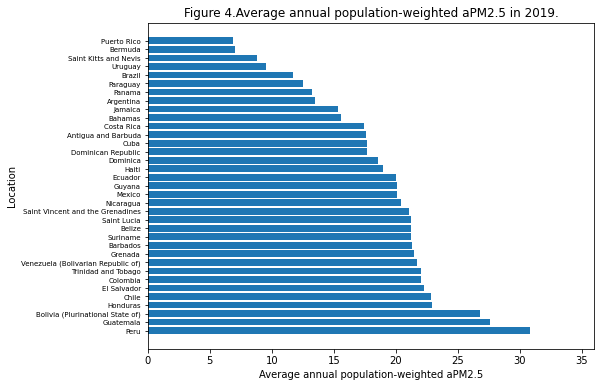

In [85]:
#average annual population-weighted aPM2.5 in 2019
data_pm25_2019 = data_pm[data_pm['Year'] == 2019]

# # Europa len = 43 * 3 tipo de enfermedades
print(len(data_pm25_2019))
data_pm25_2019 = data_pm25_2019.sort_values(by='Exposure Mean',ascending=False)
### PLOT
# Generamos Gráfico de barras
plt.figure(figsize=(8, 6))
# Crear un gráfico de barras horizontales
plt.barh(data_pm25_2019['Country'], data_pm25_2019['Exposure Mean'], height=0.8)
plt.xlim(0, 36) 
# Agregar etiquetas a los ejes
plt.xlabel('Average annual population-weighted aPM2.5')
plt.ylabel('Location')
plt.yticks( fontsize=7)
# Agregar título
plt.title('Figure 4.Average annual population-weighted aPM2.5 in 2019.')

# Mostrar el gráfico
plt.show()

Cause                               Ischemic heart disease   Stroke  \
Location                                                              
Haiti                                              1296.69  1400.62   
Honduras                                            664.01   625.34   
Guyana                                              651.70   578.01   
Dominican Republic                                  552.11   337.90   
Suriname                                            395.13   414.87   
Nicaragua                                           511.11   247.08   
Bolivia (Plurinational State of)                    380.63   345.47   
Guatemala                                           433.10   281.10   
Venezuela (Bolivarian Republic of)                  429.64   203.36   
Grenada                                             319.08   304.46   
Saint Vincent and the Grenadines                    347.54   284.53   
Trinidad and Tobago                                 384.14   214.52   
Paragu

<Figure size 720x1440 with 0 Axes>

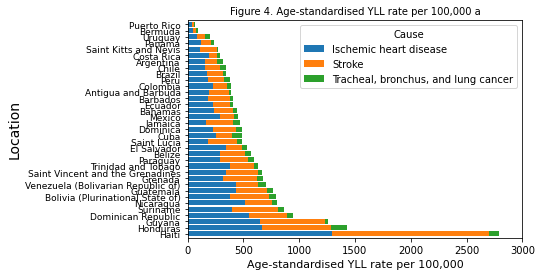

In [15]:
# Figure 4. Age-standardised YLL rate per 100,000 and average annual population-weighted aPM2.5 in 2019.
# Ojo que la funcion es otra, serian todas las causas menos all causes
#years of life lost (YLL) 2019
yll_ihd = filtrado_2 (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)

# # Agrupar por país y causa, y sumar los valores
df_grouped = yll_ihd.groupby(['Location', 'Cause'])['Value'].sum().unstack()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
print(df_grouped)
# Generamos plot de YLL
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 20))
# Crear un gráfico de barras horizontales apiladas
df_grouped.plot(kind='barh', stacked=True, width=0.82)
# Agregar etiquetas a los ejes
plt.xlabel('Age-standardised YLL rate per 100,000', fontsize=11)
plt.ylabel('Location', fontsize=14)
plt.yticks( fontsize=9)
plt.xlim(0, 3000) 
# Agregar título
plt.title('Figure 4. Age-standardised YLL rate per 100,000 a', fontsize=10)
# Mostrar el gráfico
plt.show()

Spearman r =  0.589 p value =  0.0001977054698904784
Media de concentraciones de aPM2.5:  18.54 μg/m3


,Location,Value,Exposure Mean
27,Puerto Rico,144.46,6.85
28,Bermuda,152.00,7.07
29,Saint Kitts and Nevis,479.31,8.79
1,Uruguay,315.14,9.53
24,Brazil,665.92,11.70
26,Paraguay,956.34,12.50
20,Panama,444.82,13.20
2,Argentina,548.86,13.50
21,Jamaica,887.88,15.30
7,Bahamas,678.39,15.60


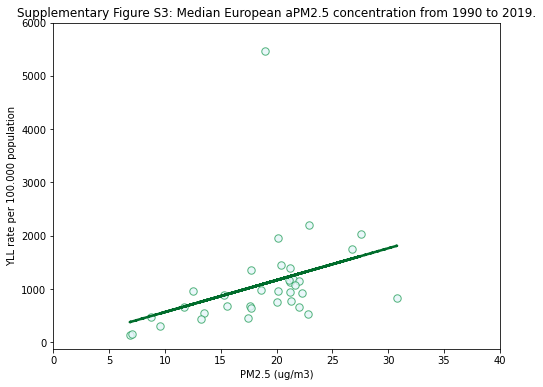

In [68]:
# #Años de vida perdidos por cada por cada 100,000 habitantes en Latinoamérica en 2019
YLL_sup3 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
data_pm_2019 = data_pm[data_pm['Year'] == 2019]
len(data_pm_2019)
data_pm_2019 = data_pm_2019.rename(columns={'Country':"Location"})
# Union de las tablas de 1990 - 2019 para ser comparadas
supp3 = pd.merge(YLL_sup3, data_pm_2019, on='Location', how='inner')
supp3
# Obtenemos estadisticas 
# Estimamos la relacion lineal entre las concentraciones de PMponderadas por la poblacion vs la metrica de salud YLL
slope_supp3 , intercept_supp3 , r_supp3 , _supp3 , stderr_supp3  = scipy.stats.linregress(supp3['Exposure Mean'] , supp3['Value'])
# Variables de interes
x = supp3['Exposure Mean'].values.reshape(-1,1)
y = supp3['Value'].values.reshape(-1,1)   
# Generamos modelo lineal        
linear_regresion_supp = LinearRegression()
linear_regresion_supp.fit(x,y)
li_predict_supp = linear_regresion_supp.predict(x)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(supp3['Exposure Mean'], supp3['Value'], marker='o',color = '#e5f5f9', alpha=0.8,s = 55,edgecolor="#2ca25f")
plt.plot(x,li_predict_supp,c="#006d2c",linestyle="dashed",linewidth=2.5)
plt.yticks(range(0, 7000, 1000))
plt.xticks(range(0,45,5))
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('YLL rate per 100.000 population')
plt.title('Supplementary Figure S3: Median European aPM2.5 concentration from 1990 to 2019.')
# Calcular el coeficiente de Spearman
coef_spearman, p_value = spearmanr(supp3['Exposure Mean'], supp3['Value'])
print("Spearman r = ",round(coef_spearman,3),"p value = ", p_value)
supp3_subset = supp3[['Location','Value','Exposure Mean']]
supp3_subset = supp3_subset.sort_values(by='Exposure Mean',ascending=True)
#supp3_subset = supp3_subset.sort_values(by='Value',ascending=True)
supp3_subset
media_concentraciones = round(supp3_subset['Exposure Mean'].mean(),2)
print("Media de concentraciones de aPM2.5: ",media_concentraciones,"μg/m3")

supp3_subset

Puerto Rico y Bermuda tienen la tasa de YLL mas baja y ademas tienen las concentraciones mas bajas
Haiti tuvo la tasa más alta de YLL pero sus concentraciones son medias de Latam. 
El país con las concentraciones más altas de aPM2.5 es Perú pero con valores de YLL relativamente moderados.
Entonces en Haiti hay otras variables que juegan un papel importante y no solo las concentraciones
En el plot el punto maximo que se observa de YLL es Haiti, un outlier. Se observa una moderada correlación positiva entre la concentración de aPM2.5 y la tasa de YLL (r = 0.589,  p = 0.0002)

Si comparamos con el trabajo original de Europa vemos que las concentraciones mínimas (Lat 5.03, EU 5.57  μg/m3) y máximas (Lat 30.8, EU 30.3  μg/m3) son similares varían en un rango del 1 al 10%, pero en lo que respecta a YLL, se observa que LatAm presenta un aumento del 57.9% al 59.6% en comparación con los países europeos para el año 2019. Donde los valores minimos de YLL son 144.46 Lat y	60.86 EU, mientras que los valores maximos 5476.59 Lat y 2214.93 EU
Europa se observó una fuerte correlación positiva entre la concentración de aPM2.5 y la tasa de YLL (r = 0.911, p < 0.0001) mientras que en Latam esta correlacion es moderada


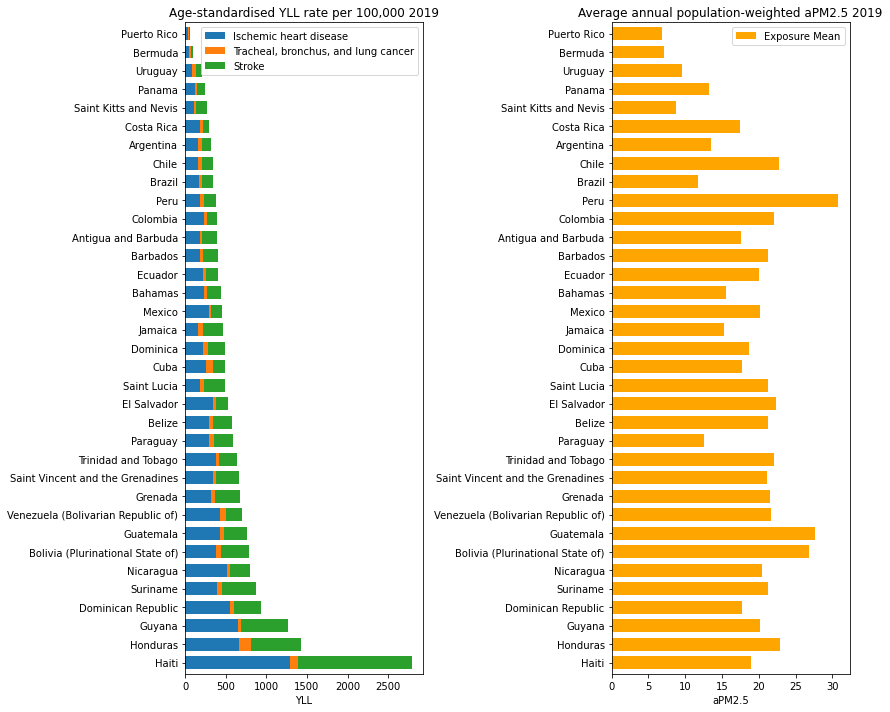

In [86]:
#Igual que plots anterior pero ponemos dos plots en uno mismo

#years of life lost (YLL) 2019
yll_ihd = filtrado_2 (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)
# Agrupar por país y causa, y sumar los valores
df_grouped = yll_ihd.groupby(['Location', 'Cause'])['Value'].sum().unstack()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
# Datos de aPM25
data_pm25_2019 = data_pm[data_pm['Year'] == 2019]
data_pm25_2019 = data_pm25_2019.rename(columns={'Country':"Location"})
# Hacemos un merge pero es solo para ordenar los datos, despues los separamos otra vez
df_grouped_merge = pd.merge(df_grouped, data_pm25_2019, on='Location', how='inner')
# Generamos df por separado para hacer los plots
df_grouped_merge['suma'] = df_grouped_merge['Ischemic heart disease'] + df_grouped_merge['Stroke']+df_grouped_merge['Tracheal, bronchus, and lung cancer']
df_grouped_merge_plot_1 = df_grouped_merge[["Location","Ischemic heart disease", "Tracheal, bronchus, and lung cancer","Stroke"]]
df_grouped_merge_plot_2 = df_grouped_merge[["Location","Exposure Mean"]]
# Establecer la columna "Nombre" como índice
df_grouped_merge_plot_1.set_index('Location', inplace=True)
df_grouped_merge_plot_2.set_index('Location', inplace=True)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
# Graficar en la primera subtrama
df_grouped_merge_plot_1.plot(kind='barh', stacked=True, width=0.7, ax=axes[0])
axes[0].set_title('Age-standardised YLL rate per 100,000 2019')
axes[0].set_xlabel('YLL')
axes[0].set_ylabel('')
#axes[0].set_ylabel('Eje Y')

# Graficar en la segunda subtrama

df_grouped_merge_plot_2.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
axes[1].set_title('Average annual population-weighted aPM2.5 2019')
axes[1].set_xlabel('aPM2.5')
#axes[1].set_ylabel('Eje Y')
axes[1].set_ylabel('')
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [100]:
#Principales causas de YLL
# Filtramos por separado cada una de las causas
YLL_air_pol_2019_all_causes = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
YLL_air_pol_2019_IHD = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause= "Ischemic heart disease", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
YLL_air_pol_2019_stroke = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause= "Stroke", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
YLL_air_pol_2019_TRL = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause= "Tracheal, bronchus, and lung cancer", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
#Proporcion de aporte de cada una de las causas con respecto a todas las causas
porc_YLL_air_pol_2019_IHD = round(YLL_air_pol_2019_IHD['Value'].sum() / YLL_air_pol_2019_all_causes['Value'].sum()*100,2)
porc_YLL_air_pol_2019_stroke = round(YLL_air_pol_2019_stroke['Value'].sum() / YLL_air_pol_2019_all_causes['Value'].sum()*100,2)
porc_YLL_air_pol_2019_TRL = round(YLL_air_pol_2019_TRL['Value'].sum() / YLL_air_pol_2019_all_causes['Value'].sum()*100,2)
# Hacemos un print con los resultados
print("IHD como causa años de vida perdidos aporto ", porc_YLL_air_pol_2019_IHD,"% de todas las causas")
print("Stroke como causa años de vida perdidos aporto ", porc_YLL_air_pol_2019_stroke,"% de todas las causas")
print("TRL como causa años de vida perdidos aporto ", porc_YLL_air_pol_2019_TRL,"% de todas las causas")

# Hacemos un subset y solo nos quedamos con las columnas valor y location para poder hacer un merge
# De esta forma quda una columna con cada causa para poder hacer algunos calculos
YLL_air_pol_2019_all_causes_sub = YLL_air_pol_2019_all_causes[['Location','Value']]
YLL_air_pol_2019_IHD_sub = YLL_air_pol_2019_IHD[['Location','Value']]
YLL_air_pol_2019_stroke_sub = YLL_air_pol_2019_stroke[['Location','Value']]
YLL_air_pol_2019_TRL_sub = YLL_air_pol_2019_TRL[['Location','Value']]

# Merge de todas las causas y cambiamos el nombre de la columna para entenderlo mejor
YLL_air_pol_2019 = pd.merge(YLL_air_pol_2019_all_causes_sub, YLL_air_pol_2019_IHD_sub,on='Location', how='inner')
YLL_air_pol_2019 = YLL_air_pol_2019.rename(columns={'Value_x':"Value All causes", 'Value_y':"Value IDH"})
YLL_air_pol_2019 = pd.merge(YLL_air_pol_2019, YLL_air_pol_2019_stroke_sub,on='Location', how='inner')
YLL_air_pol_2019 = YLL_air_pol_2019.rename(columns={'Value':"Value Stroke"})
YLL_air_pol_2019 = pd.merge(YLL_air_pol_2019, YLL_air_pol_2019_TRL_sub,on='Location', how='inner')
YLL_air_pol_2019 = YLL_air_pol_2019.rename(columns={'Value':"Value TRL"})
# Calculamos fue el pais que contribuyo en mayor medida con cada una de las causas
YLL_air_pol_2019['% IHD'] = round((YLL_air_pol_2019['Value IDH']/YLL_air_pol_2019['Value All causes']*100),2)
YLL_air_pol_2019['% Stroke'] = round((YLL_air_pol_2019['Value Stroke']/YLL_air_pol_2019['Value All causes']*100),2)
YLL_air_pol_2019['% TRL'] = round((YLL_air_pol_2019['Value TRL']/YLL_air_pol_2019['Value All causes']*100),2)
# Ordenamos el dataser segun el % de IHD
YLL_air_pol_2019 = YLL_air_pol_2019.sort_values(by="% IHD",ascending=False)
YLL_air_pol_2019
# Ordenamos el dataser segun el % de Stroke
YLL_air_pol_2019 = YLL_air_pol_2019.sort_values(by="% Stroke",ascending=False)
YLL_air_pol_2019

# Ordenamos el dataser segun el % de TRL
YLL_air_pol_2019 = YLL_air_pol_2019.sort_values(by="% TRL",ascending=False)
YLL_air_pol_2019

IHD como causa años de vida perdidos aporto  28.44 % de todas las causas
Stroke como causa años de vida perdidos aporto  22.78 % de todas las causas
TRL como causa años de vida perdidos aporto  4.44 % de todas las causas


,Location,Value All causes,Value IDH,Value Stroke,Value TRL,% IHD,% Stroke,% TRL
1,Uruguay,315.14,83.11,69.36,50.66,26.37,22.01,16.08
12,Cuba,650.53,254.08,140.46,95.32,39.06,21.59,14.65
28,Bermuda,152.00,52.69,22.90,20.09,34.66,15.07,13.22
3,Chile,524.48,153.76,138.00,56.20,29.32,26.31,10.72
2,Argentina,548.86,153.69,106.99,58.39,28.00,19.49,10.64
21,Jamaica,887.88,161.75,246.70,57.59,18.22,27.79,6.49
15,Colombia,657.62,230.43,118.49,42.67,35.04,18.02,6.49
33,Venezuela (Bolivarian Republic of),1069.16,429.64,203.36,68.81,40.18,19.02,6.44
23,Honduras,2210.46,664.01,625.34,141.56,30.04,28.29,6.40
22,Peru,836.83,181.95,144.01,50.94,21.74,17.21,6.09


Con la enfermedad isquémica del corazón (IHD) como la principal causa de muerte atribuible a la contaminación del aire en LatAm, analizamos la tasa de años de vida perdidos (YLL) entre los países latinoamericanos y observamos que la IHD también contribuyó en mayor medida, representando el 28.44% del total de la tasa de YLL atribuible a la contaminación del aire en 2019, seguido por Stroke con el 22.78% y por ultimo TRL (4.44%). En cuanto a IHD Costa Rica, contribuyó en mayor medida al YLL con un 42.0%, mientras que en Jamaica tuvo la menor contribución con un 18.2%.

Mientras que con Stroke Saint Kitts and Nevis, contribuyó en mayor medida al YLL con un 30.39%, mientras que en Puerto Rico tuvo la menor contribución con un 9.96%.
Y TRL Uruguay , contribuyó en mayor medida al YLL con un 16.08%, mientras que en Guyana tuvo la menor contribución con un 1.63%.

# Progress of each country compared to LatAm overall in terms of DALYs and aPM2.5.
Para evaluar el progreso y la dinámica de la reducción de los parámetros de contaminación del aire, nuestro objetivo fue determinar cuán eficientes fueron los países latinoamericanos en reducir sus valores de DALYs y aPM2.5 al menos hasta el nivel de la disminución mediana latinoamericana desde 1990 hasta 2019. 

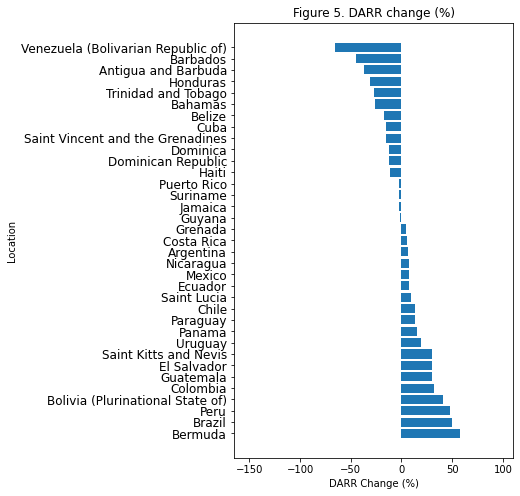

Numero de paises que disiminuyeron el DARR 19
Numero de paises que aumentaron el DARR 16


,Location,value_1990,value_2019,DARR_1990,DARR_2019,DARR_change_1990_2019
15,Bermuda,876.653097,190.774765,0.406102,0.172527,57.516266
1,Brazil,2996.420924,763.320640,1.388065,0.690309,50.268254
3,Peru,3673.848828,981.227423,1.701877,0.887373,47.859172
16,Bolivia (Plurinational State of),6335.936104,1920.361821,2.935065,1.736679,40.829969
12,Colombia,2384.648021,826.823832,1.104667,0.747738,32.310980
33,Guatemala,6473.543060,2308.773992,2.998810,2.087939,30.374407
17,El Salvador,3112.894788,1110.718559,1.442020,1.004478,30.342303
11,Saint Kitts and Nevis,1578.185909,563.984508,0.731080,0.510039,30.234849
6,Uruguay,877.486933,360.814634,0.406488,0.326303,19.726350
14,Panama,1347.939447,582.115851,0.624421,0.526436,15.692043


In [4]:
# Figure 5. DARR change (%)
# DALY rate 1990 country
daly_rate_1990 = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
# DALY rate 1990 
median_1990 =daly_rate_1990['Value'].median()
# DALY rate 2019 country
daly_rate_2019 = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# DALY rate 2019
median_2019 = daly_rate_2019['Value'].median()
# DARR change 1990-2019
daly_rate = pd.merge(daly_rate_1990, daly_rate_2019, on='Location', how='inner')
#Vemos el nombre de las columnas para cambiarle el nombre
#daly_rate.columns
daly_rate = daly_rate.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
#Generamos un df nuevo y solo nos quedamos con las columnas del nombre de los paises y el % de cambio calculado
DARR = daly_rate[['Location', 'value_1990', 'value_2019']]
DARR['DARR_1990'] =  DARR['value_1990'] / median_1990
DARR['DARR_2019'] =  DARR['value_2019'] / median_2019
# Calulamos el cambio de DARR entre 1990-2019
DARR['DARR_change_1990_2019'] = ((DARR['DARR_1990'] - DARR['DARR_2019'])/DARR['DARR_1990'])*100
#Ordenamos valores
DARR = DARR.sort_values(by='DARR_change_1990_2019',ascending=False)

### PLOT
# Generamos Gráfico de barras
plt.figure(figsize=(5, 8))
# Crear un gráfico de barras horizontales
plt.barh(DARR['Location'], DARR['DARR_change_1990_2019'], height=0.8)
plt.xlim(-165, 110) 
# Agregar etiquetas a los ejes
plt.xlabel('DARR Change (%)')
plt.ylabel('Location')
plt.yticks( fontsize=12)
# Agregar título
plt.title('Figure 5. DARR change (%)')

# Mostrar el gráfico
plt.show()
# Cuantos paises tuvieron un cambio positivo en el periodo analizado, es decir disiminuyeron su DARR
DARR_positivos = DARR[DARR['DARR_change_1990_2019']>0]
print("Numero de paises que disiminuyeron el DARR",len(DARR_positivos))
DARR_negativos = DARR[DARR['DARR_change_1990_2019']<0]
print("Numero de paises que aumentaron el DARR",len(DARR_negativos))

DARR

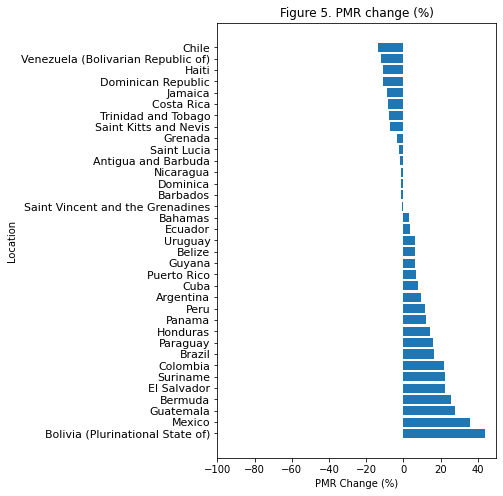

Numero de paises que disiminuyeron las concentraciones 27
Numero de paises que aumentaron las concentraciones 8
Numero de paises que disiminuyeron el PMR 20
Numero de paises que aumentaron el PMR 15


,Country,value_1990,value_2019,PMR_1990,PMR_2019,PMR_change_1990_2019,diferencia_concentraciones
5,Bolivia (Plurinational State of),50.00,26.80,2.380952,1.333333,44.000000,23.20
21,Mexico,32.70,20.10,1.557143,1.000000,35.779817,12.60
16,Guatemala,40.00,27.60,1.904762,1.373134,27.910448,12.40
34,Bermuda,9.93,7.07,0.472857,0.351741,25.613624,2.86
14,El Salvador,30.10,22.30,1.433333,1.109453,22.596321,7.80
30,Suriname,28.50,21.20,1.357143,1.054726,22.283320,7.30
8,Colombia,29.50,22.00,1.404762,1.094527,22.084493,7.50
6,Brazil,14.60,11.70,0.695238,0.582090,16.274790,2.90
24,Paraguay,15.50,12.50,0.738095,0.621891,15.743861,3.00
19,Honduras,28.00,22.90,1.333333,1.139303,14.552239,5.10


In [7]:
data_pm
# Figure 5. PMR change (%) for Latinamerican countries

# DALY rate 1990 country
PMR_1990 = data_pm[data_pm['Year'] == 1990]
# DALY rate 1990 
exposure_median_1990 = PMR_1990['Exposure Mean'].median()
# DALY rate 2019 country
PMR_2019 = data_pm[data_pm['Year'] == 2019]
exposure_median_2019 = PMR_2019['Exposure Mean'].median()
# PMR change 1990-2019
PMR_merge = pd.merge(PMR_1990, PMR_2019, on='Country', how='inner')

# daly_rate.columns
PMR_merge = PMR_merge.rename(columns={'Exposure Mean_x':"value_1990", 'Exposure Mean_y':"value_2019"})
# #Generamos un df nuevo y solo nos quedamos con las columnas del nombre de los paises y el % de cambio calculado
PMR = PMR_merge[['Country', 'value_1990', 'value_2019']]
#Calculamos PMR para cada año
PMR['PMR_1990'] =  PMR['value_1990'] / exposure_median_1990
PMR['PMR_2019'] =  PMR['value_2019'] / exposure_median_2019
# Calculamos la diferencia de PMR para el periodo 1990-2019
PMR['PMR_change_1990_2019'] = ((PMR['PMR_1990'] - PMR['PMR_2019'])/PMR['PMR_1990'])*100
# Ordenamos df segun los valores
PMR = PMR.sort_values(by='PMR_change_1990_2019',ascending=False)
#print(PMR)
# ### PLOT
# # Generamos Gráfico de barras
plt.figure(figsize=(5, 8))
# Crear un gráfico de barras horizontales
plt.barh(PMR['Country'], PMR['PMR_change_1990_2019'], height=0.8)
plt.xlim(-100, 50) 
# Agregar etiquetas a los ejes
plt.xlabel('PMR Change (%)')
plt.ylabel('Location')
plt.yticks( fontsize=11)
# Agregar título
plt.title('Figure 5. PMR change (%)')

# Mostrar el gráfico
plt.show()


# Paises que disminuyeron/aumentaron las concentracion entre 1990-2019
PMR['diferencia_concentraciones'] = PMR['value_1990']- PMR['value_2019']
diferencia_concentraciones_positivos = PMR[PMR['diferencia_concentraciones']>0]
print("Numero de paises que disiminuyeron las concentraciones",len(diferencia_concentraciones_positivos))
diferencia_concentraciones_negativos = PMR[PMR['diferencia_concentraciones']<0]
print("Numero de paises que aumentaron las concentraciones",len(diferencia_concentraciones_negativos))

# Cuantos paises tuvieron un cambio positivo en el periodo analizado, es decir disiminuyeron su DARR
PMR_positivos = PMR[PMR['PMR_change_1990_2019']>0]
print("Numero de paises que disiminuyeron el PMR",len(PMR_positivos))
PMR_negativos = PMR[PMR['PMR_change_1990_2019']<0]
print("Numero de paises que aumentaron el PMR",len(PMR_negativos))
#Ordenamos por valores de aPM2.5 2019
# PMR_sort_value_2019 = PMR.sort_values(by='value_2019',ascending=False)
# PMR_sort_value_2019
# PMR_sort_value_1990 = PMR.sort_values(by='value_1990',ascending=False)
# PMR_sort_value_1990
# #Ordenamos por valores de aPM2.5 2019
PMR_sort_PMR= PMR.sort_values(by='PMR_change_1990_2019',ascending=False)
PMR_sort_PMR

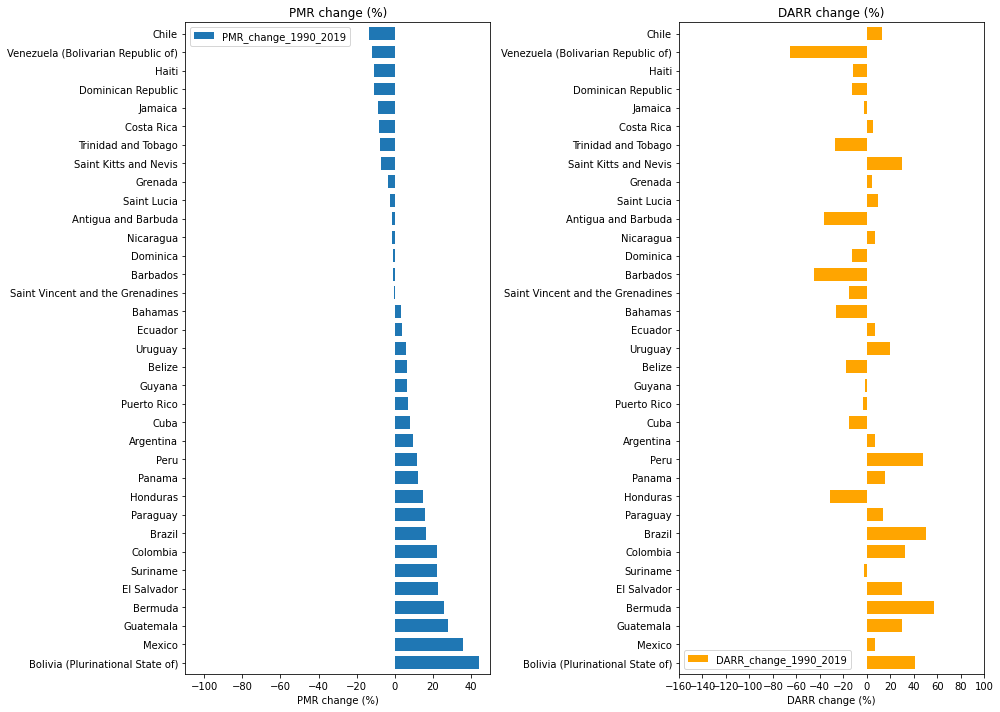

In [8]:
# Idem anterior pero ponemos los plots en el mismo como subplot
# Hacemos un pre-procesamiento para unir los dos df en uno mismo y ordenar los datos seguro PMR
PMR = PMR.rename(columns={'Country':"Location"})
merge_DARR_PMR = pd.merge(PMR, DARR, on='Location', how='inner')
merge_DARR_PMR.set_index('Location', inplace=True)
merge_DARR_PMR = merge_DARR_PMR.sort_values(by='PMR_change_1990_2019',ascending=False)
PMR_change_1990_2019 = merge_DARR_PMR[["PMR_change_1990_2019"]]
DARR_change_1990_2019 = merge_DARR_PMR[["DARR_change_1990_2019"]]

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
# Graficar en la primera subtrama
PMR_change_1990_2019.plot(kind='barh',width=0.7, ax=axes[0])
axes[0].set_title('PMR change (%)')
axes[0].set_xlabel('PMR change (%)')
axes[0].set_ylabel('')
axes[0].set_xlim(-110,50)  
#axes[0].set_ylabel('Eje Y')

# Graficar en la segunda subtrama

DARR_change_1990_2019.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
axes[1].set_title('DARR change (%)')
axes[1].set_xlabel('DARR change (%)')
#axes[1].set_ylabel('Eje Y')
axes[1].set_ylabel('')
#axes[1].set_xlim(-190,110) 
axes[1].set_xticks(range(-160, 110, 20)) 
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [9]:
# Calcular el coeficiente de Spearman
coef_spearman_1990, p_value_1990 = spearmanr(merge_DARR_PMR['DARR_1990'], merge_DARR_PMR['PMR_1990'])
print("Spearman r = ",round(coef_spearman_1990,3),"p value = ", round(p_value_1990,4))

coef_spearman_2019, p_value_2019 = spearmanr(merge_DARR_PMR['DARR_2019'], merge_DARR_PMR['PMR_2019'])
print("Spearman r = ",round(coef_spearman_2019,3),"p value = ", round(p_value_2019,4))

Spearman r =  0.611 p value =  0.0001
Spearman r =  0.625 p value =  0.0001


- Figure 5. DARR change (%) and PMR change (%) for Latinamerican countries
*Se utilizó el cambio en la proporción de aPM2.5 (concentración anual promedio de partículas finas) y el cambio en la proporción de la tasa de DALY (Años de Vida Ajustados por Discapacidad) (DARR) para evaluar la capacidad de cada país para reducir su contaminación de aPM2.5 y los DALYs al menos hasta el nivel de disminución mediana Latinoamericanos dentro del período analizado.
* Este valor representa la diferencia entre la tasa de DALY atribuible a la contaminación del aire de cada país para los dos años dados (1990 y 2019), dividida por la mediana Lat de DALY para 1990.

# Conclusiones PMR - DARR:
-Tasa de Reducción de Partículas (PMR) y Tasa de Años de Vida Ajustados por Discapacidad (DARR)
Se utilizaron como medida de la capacidad de cada país para reducir sus valores de aPM2.5/DALYs mínimamente hasta el grado de la disminución mediana de paises Latinoamericanos. 
* 19 de los 35 países latinoamericanos mejoraron su Tasa DARR, es decir, experimentaron un cambio positivo en la DARR. Estos países redujeron mínimamente su tasa DALY atribuible a la contaminación del aire hasta el nivel de la reducción mediana latinoamericanos. 
* Perú, Brasil y Bermuda, mostraron la mayor mejora al disminuir su DARR del 1990 al 2019 en un 47.98%, 50.38%, y 57.52% respectivamente. 
* 16 de los 35 países aumentaron su DARR y se representan con un cambio negativo en la DARR. Por lo tanto, no pudieron reducir sus valores de DALY al menos hasta el grado de la disminución mediana latinoamericanos. 
* Venezuela y Barbados registraron los valores más negativos con un aumento del 65.30% y 44.80%, respectivamente.
* Si bien 27 países disminuyeron sus niveles de aPM2.5 en 2019 y 8 países aumentaron sus niveles de aPM2.5, 15 de los 35 países Latinoamericano tuvieron un cambio negativo en la PMR y una tendencia desfavorable de aumentar la PMR en 2019 en comparación con 1990. Por lo que no lograron reducir su concentración de aPM2.5 al menos hasta el grado de disminución en la mediana Latinoamericano.
* Chile tuvo el cambio de PMR más destacado con una disminución del 13.43%, siendo el quinto país con niveles más altos de aPM2.5 2019 (22.80 ug/m3), mientras que en 1990 coincide con la mediana Latinoamericana. 

* 19 de los 35 países tuvieron un cambio positivo en la PMR y una tendencia favorable de disminuir los valores de aPM2.5 al menos hasta el grado de la disminución mediana Latinoamericano
* Bolivia tuvo el cambio de PMR más destacado con una disminución del 44.0%, siendo el tercer país con niveles más altos de aPM2.5 2019 (26.80 ug/m3) y el primer país con niveles más altos de aPM2.5 en 1990 (50.0ug/m3). Seguido por México y Guatemala con una disminución del PMR de 35.78% y 27.91%, respectivamente. 
* Mediante la prueba de Spearman, se estableció una correlación positiva tanto para 1990 (r = 0.611) como para 2019 (r = 0.625) entre DARR y PMR. 

In [16]:
#Utilizando este cálculo, también se analizaron YRR y DRR 
# Filtramos datos de YLL years of life lost 1990-2019
YLL_2019 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
YLL_1990 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=1990)
# Nos quedamos solo con las dos columnas de interes
YLL_2019 = YLL_2019[['Location', "Value"]]
YLL_1990 = YLL_1990[['Location', "Value"]]
#Unimos los dataframe
YLL_merge = pd.merge(YLL_1990, YLL_2019, on='Location', how='inner')
#Renombramos columnas
YLL_merge = YLL_merge.rename(columns={'Value_x':"YLL_1990", 'Value_y':"YLL_2019"})
# Medianas Latinoamericanas
YLL_1990_median = YLL_merge['YLL_1990'].median()
YLL_2019_median =YLL_merge['YLL_2019'].median()
# Razón de la Tasa de Años de Vida Perdidos (YLL)
# YRR 1990
YLL_merge['YRR_1990'] =  round(YLL_merge['YLL_1990'] / YLL_1990_median,2)
# YRR 2019
YLL_merge['YRR_2019'] = round(YLL_merge['YLL_2019'] / YLL_2019_median,2)

# YRR change (%)
YLL_merge['YRR_change'] = round(((YLL_merge['YRR_1990'] - YLL_merge['YRR_2019'])/YLL_merge['YRR_1990'] )*100,2)
YLL_merge = YLL_merge.sort_values(by='Location')
YLL_merge

# YLL_merge = YLL_merge.sort_values(by='YRR_change')
# YLL_merge

,Location,YLL_1990,YLL_2019,YRR_1990,YRR_2019,YRR_change
0,Antigua and Barbuda,1080.46,685.27,0.54,0.74,-37.04
2,Argentina,1230.58,548.86,0.61,0.59,3.28
7,Bahamas,1139.60,678.39,0.57,0.73,-28.07
4,Barbados,1148.22,781.61,0.57,0.84,-47.37
5,Belize,2003.54,1130.00,1.00,1.22,-22.00
28,Bermuda,807.91,152.00,0.40,0.16,60.00
13,Bolivia (Plurinational State of),6105.65,1745.70,3.05,1.89,38.03
24,Brazil,2802.90,665.92,1.40,0.72,48.57
3,Chile,1350.39,524.48,0.67,0.57,14.93
15,Colombia,2159.82,657.62,1.08,0.71,34.26


In [14]:
#Death rate attributable to air pollution
Deaths_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
Deaths_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=1990)
print(len(Deaths_2019))
print(len(Deaths_1990))
# 
Deaths_2019 = Deaths_2019[['Location', "Value"]]
Deaths_1990 = Deaths_1990[['Location', "Value"]]

Deaths_merge = pd.merge(Deaths_1990, Deaths_2019, on='Location', how='inner')
Deaths_merge = Deaths_merge.rename(columns={'Value_x':"DRR_1990", 'Value_y':"DRR_2019"})
# Medianas Europeas
DRR_1990_median = Deaths_merge['DRR_1990'].median()
DRR_2019_median =Deaths_merge['DRR_2019'].median()

# YRR 1990
Deaths_merge['DRR_1990'] = round(Deaths_merge['DRR_1990'] / DRR_1990_median,2)
# YRR 2019
Deaths_merge['DRR_2019'] = round(Deaths_merge['DRR_2019'] / DRR_2019_median,2)

# YRR change (%)
Deaths_merge['DRR_change'] = round(((Deaths_merge['DRR_1990'] - Deaths_merge['DRR_2019'])/Deaths_merge['DRR_1990'] )*100,2)
Deaths_merge = Deaths_merge.sort_values(by='Location')
Deaths_merge

# Deaths_merge = Deaths_merge.sort_values(by='DRR_change')
# Deaths_merge

35
35


,Location,DRR_1990,DRR_2019,DRR_change
0,Antigua and Barbuda,0.58,0.80,-37.93
16,Argentina,0.63,0.61,3.17
23,Bahamas,0.56,0.68,-21.43
9,Barbados,0.63,0.88,-39.68
21,Belize,0.98,1.14,-16.33
29,Bermuda,0.47,0.17,63.83
8,Bolivia (Plurinational State of),2.24,1.85,17.41
20,Brazil,1.21,0.65,46.28
14,Chile,0.79,0.64,18.99
10,Colombia,1.05,0.71,32.38


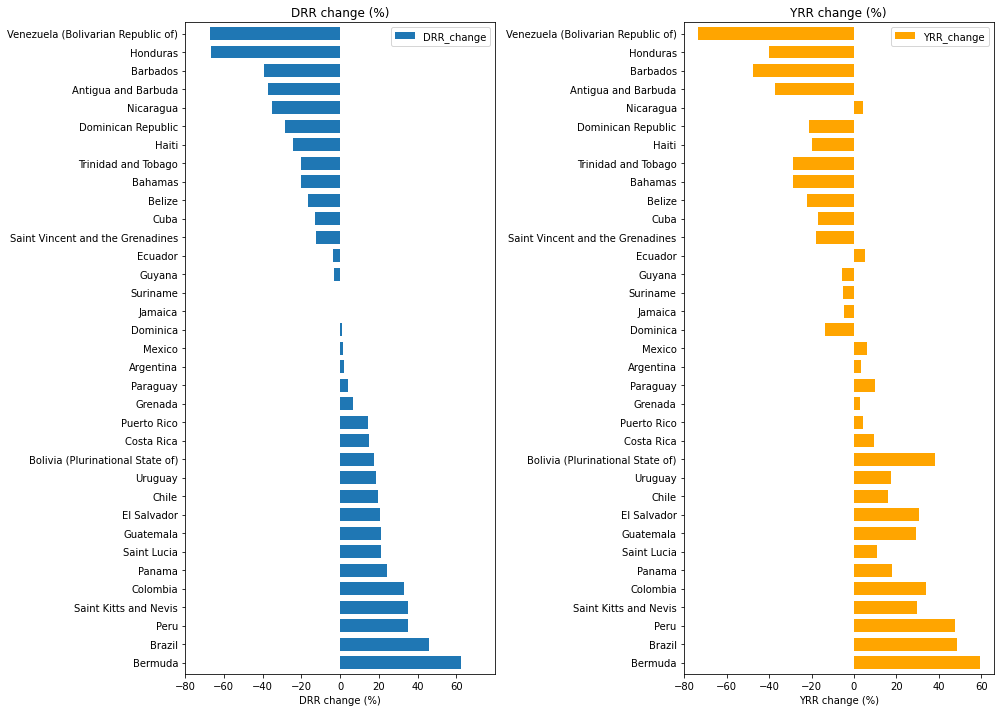

In [12]:
#Unir DRR con YRR para hacer un mismo plor
DRR_YRR_merge = pd.merge(Deaths_merge, YLL_merge, on='Location', how='inner')
DRR_YRR_merge = DRR_YRR_merge.sort_values(by='DRR_change',ascending=False)
DRR_change = DRR_YRR_merge[['Location','DRR_change']]
YRR_change = DRR_YRR_merge[['Location','YRR_change']]
DRR_change.set_index('Location', inplace=True)
YRR_change.set_index('Location', inplace=True)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
# Graficar en la primera subtrama
DRR_change.plot(kind='barh',width=0.7, ax=axes[0])
axes[0].set_title('DRR change (%)')
axes[0].set_xlabel('DRR change (%)')
axes[0].set_ylabel('')
axes[0].set_xlim(-80,80)  
axes[0].set_xticks(range(-80, 80, 20)) 
#axes[0].set_ylabel('Eje Y')

# Graficar en la segunda subtrama

YRR_change.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
axes[1].set_title('YRR change (%)')
axes[1].set_xlabel('YRR change (%)')
#axes[1].set_ylabel('Eje Y')
axes[1].set_ylabel('')
#axes[1].set_xlim(-190,110) 
axes[1].set_xticks(range(-80, 80, 20)) 
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [24]:
DRR_YRR_merge
# Cuantos paises tuvieron un cambio positivo en el periodo analizado, es decir disiminuyeron su YRR
YRR_positivos = DRR_YRR_merge[DRR_YRR_merge['YRR_change']>0]
print("Numero de paises que disiminuyeron el YRR",len(YRR_positivos))
YRR_negativos = DRR_YRR_merge[DRR_YRR_merge['YRR_change']<0]
print("Numero de paises que aumentaron el YRR",len(YRR_negativos))


# Cuantos paises tuvieron un cambio positivo en el periodo analizado, es decir disiminuyeron su DRR
DRR_positivos = DRR_YRR_merge[DRR_YRR_merge['DRR_change']>0]
print("Numero de paises que disiminuyeron el DRR",len(DRR_positivos))
DRR_negativos = DRR_YRR_merge[DRR_YRR_merge['DRR_change']<0]
print("Numero de paises que aumentaron el DRR",len(DRR_negativos))

DRR_YRR_merge = DRR_YRR_merge.sort_values(by='DRR_change',ascending=False)
DRR_YRR_merge


Numero de paises que disiminuyeron el YRR 20
Numero de paises que aumentaron el YRR 15
Numero de paises que disiminuyeron el DRR 20
Numero de paises que aumentaron el DRR 15


,Location,DRR_1990,DRR_2019,DRR_change,YLL_1990,YLL_2019,YRR_1990,YRR_2019,YRR_change
34,Bermuda,0.468556,0.174835,62.69,807.91,152.00,0.403241,0.164317,59.25
33,Brazil,1.210510,0.652099,46.13,2802.90,665.92,1.398974,0.719882,48.54
32,Peru,1.303867,0.845109,35.18,3471.41,836.83,1.732638,0.904642,47.79
31,Saint Kitts and Nevis,0.766644,0.498232,35.01,1477.31,479.31,0.737350,0.518151,29.73
30,Colombia,1.053083,0.706495,32.91,2159.82,657.62,1.078002,0.710910,34.05
29,Panama,0.622737,0.472994,24.05,1176.68,444.82,0.587300,0.480866,18.12
28,Saint Lucia,1.280933,1.011289,21.05,2292.71,943.13,1.144330,1.019556,10.90
27,Guatemala,2.616076,2.068703,20.92,6220.77,2031.12,3.104889,2.195710,29.28
26,El Salvador,1.259207,1.000000,20.58,2898.48,925.04,1.446679,1.000000,30.88
25,Chile,0.791419,0.637621,19.43,1350.39,524.48,0.674002,0.566981,15.88


# Conclusiones YRR - DRR:
- YLL rate attributable to air pollution - Death rate attributable to air pollution
 
* 20 de los 35 países latinoamericanos mejoraron su Tasa YRR, es decir, experimentaron un cambio positivo en la DARR. Estos países redujeron mínimamente su tasa DALY atribuible a la contaminación del aire hasta el nivel de la reducción mediana latinoamericanos. 

* Bermuda, Brasil y Perú, mostraron la mayor mejora al disminuir su YRR del 1990 al 2019 en un 59.25%, 48.54% y con 47.79% respectivamente. 
* 15 de los 35 países aumentaron su YRR y se representan con un cambio negativo en la YTT. Por lo tanto, no pudieron reducir sus valores de YLL al menos hasta el grado de la disminución mediana latinoamericanos. 
* Venezuela y Barbados registraron los valores más negativos con un aumento del 73.73% y 47.44%, respectivamente.


* 20 de los 35 países tuvieron un cambio positivo en la DRR y una tendencia favorable de disminuir los valores de DRR al menos hasta el grado de la disminución mediana Latinoamericano

* Bermuda, Brasil y Perú, mostraron la mayor mejora al disminuir su DRR del 1990 al 2019 en un 62.69%, 46.13% y 35.18% respectivamente. 

* 15 de los 35 países aumentaron su DRR y se representan con un cambio negativo en la DRR. Por lo tanto, no pudieron reducir sus valores de DR al menos hasta el grado de la disminución mediana latinoamericanos. 
* Venezuela, Honduras y Barbados registraron los valores más negativos con un aumento del 67.05%, 66.73% y 39.40%, respectivamente.


# Impact of economic and social factors on air pollution‑related disease burden:

# Supplementary Table S2. Deaths, age-standardised death rates and DALY rate attributable to air pollution for European countries in 2019.

In [112]:
sup_tabla_2_muertes_num = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
len(sup_tabla_2_muertes_num)
sup_tabla_2_muertes_rate = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
len(sup_tabla_2_muertes_rate)
sup_tabla_2_muertes_rate

sup_tabla_2_DALYs_rate = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
len(sup_tabla_2_DALYs_rate)
sup_tabla_2_DALYs_rate

sup_tabla_2 = pd.merge(sup_tabla_2_muertes_num, sup_tabla_2_muertes_rate, on='Location', how='inner')
sup_tabla_2 = sup_tabla_2.rename(columns={'Value_x':"muertes_num", 'Value_y':"muertes_rate"})
sup_tabla_2 = sup_tabla_2[["Location","muertes_num","muertes_rate"]]
sup_tabla_2 = pd.merge(sup_tabla_2, sup_tabla_2_DALYs_rate, on='Location', how='inner')

sup_tabla_2 = sup_tabla_2.rename(columns={'Value':"DALYs_rate"})
sup_tabla_2 = sup_tabla_2[["Location","muertes_num","muertes_rate","DALYs_rate"]]
sup_tabla_2 = sup_tabla_2.sort_values(by='Location')
sup_tabla_2

,Location,muertes_num,muertes_rate,DALYs_rate
31,Antigua and Barbuda,30.495864,33.354500,841.970495
11,Argentina,13777.693490,25.404859,628.206430
13,Bahamas,102.294786,28.088365,811.384132
28,Barbados,175.099177,36.612677,950.000063
9,Belize,124.351536,47.243371,1298.066610
29,Bermuda,9.618290,7.258381,190.774765
33,Bolivia (Plurinational State of),6254.744838,76.702092,1920.361821
6,Brazil,60914.604200,27.072228,763.320640
21,Chile,6244.415814,26.471187,660.232277
0,Colombia,15711.091450,29.330504,826.823832


# Supplementary Table S3. Ratio of YLL rate attributable to air pollution and death rate attributable to air pollution in 1990 and 2019 for LatinAmerican countries.

In [115]:
Deaths_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
Deaths_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=1990)
print(len(Deaths_2019))
print(len(Deaths_1990))
# 
Deaths_2019 = Deaths_2019[['Location', "Value"]]
Deaths_1990 = Deaths_1990[['Location', "Value"]]

Deaths_merge = pd.merge(Deaths_1990, Deaths_2019, on='Location', how='inner')
Deaths_merge = Deaths_merge.rename(columns={'Value_x':"DRR_1990", 'Value_y':"DRR_2019"})
# Medianas Europeas
DRR_1990_median = Deaths_merge['DRR_1990'].median()
DRR_2019_median =Deaths_merge['DRR_2019'].median()

# YRR 1990
Deaths_merge['DRR_1990'] = Deaths_merge['DRR_1990'] / DRR_1990_median
# YRR 2019
Deaths_merge['DRR_2019'] = Deaths_merge['DRR_2019'] / DRR_2019_median

# YRR change (%)
Deaths_merge['DRR_change'] = round(((Deaths_merge['DRR_1990'] - Deaths_merge['DRR_2019'])/Deaths_merge['DRR_1990'] )*100,2)
Deaths_merge = Deaths_merge.sort_values(by='Location')
Deaths_merge

35
35


,Location,DRR_1990,DRR_2019,DRR_change
0,Antigua and Barbuda,0.584944,0.803422,-37.35
16,Argentina,0.625667,0.611936,2.19
23,Bahamas,0.563800,0.676575,-20.00
9,Barbados,0.632665,0.881903,-39.40
21,Belize,0.977700,1.137969,-16.39
29,Bermuda,0.468556,0.174835,62.69
8,Bolivia (Plurinational State of),2.244871,1.847552,17.70
20,Brazil,1.210510,0.652099,46.13
14,Chile,0.791419,0.637621,19.43
10,Colombia,1.053083,0.706495,32.91


La exposición promedio de aPM2.5 (PM2.5 ambiente) de los países Latinoamericanos fue de 21.31 μg/m3 (IC del 95%: 18.3–24.3) en 1990, mientras que en 2019 fue un 13.4% más baja,  alcanzando los 18.49μg/m3 (IC del 95%: 16.3–20.3).

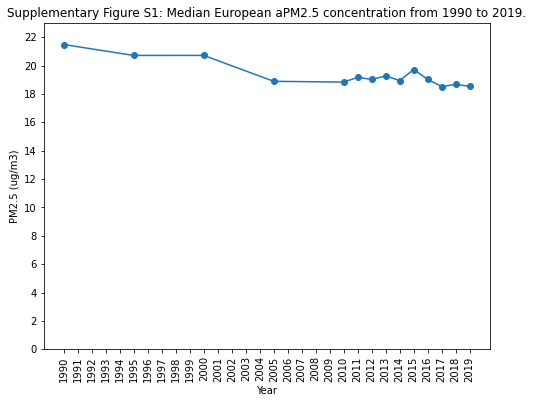

,Year,Exposure Mean
0,1990,21.491143
1,1995,20.721429
2,2000,20.724571
3,2005,18.897143
4,2010,18.843143
5,2011,19.178000
6,2012,19.029714
7,2013,19.277714
8,2014,18.950857
9,2015,19.730286


In [109]:
# Supplementary Figure S1: Median European aPM2.5 concentration from 1990 to 2019
# Calcular el promedio de concentraciones por año
promedio_por_año = data_pm.groupby('Year')['Exposure Mean'].mean().reset_index()
promedio_por_año
# # Graficar el resultado
plt.figure(figsize=(8, 6))
plt.plot(promedio_por_año['Year'], promedio_por_año['Exposure Mean'], marker='o')
plt.xlabel('Year')
plt.ylabel('PM2.5 (ug/m3)')
plt.title('Supplementary Figure S1: Median European aPM2.5 concentration from 1990 to 2019.')
#plt.xlim(1990, 2019) 
plt.ylim(0, 23)
plt.yticks(range(0, 23, 2))
plt.xticks(range(1990,2020,1), rotation='vertical')
plt.show()
promedio_por_año

In [ ]:
rate_air_pol = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
rate_all_risk = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'All risk factors', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)


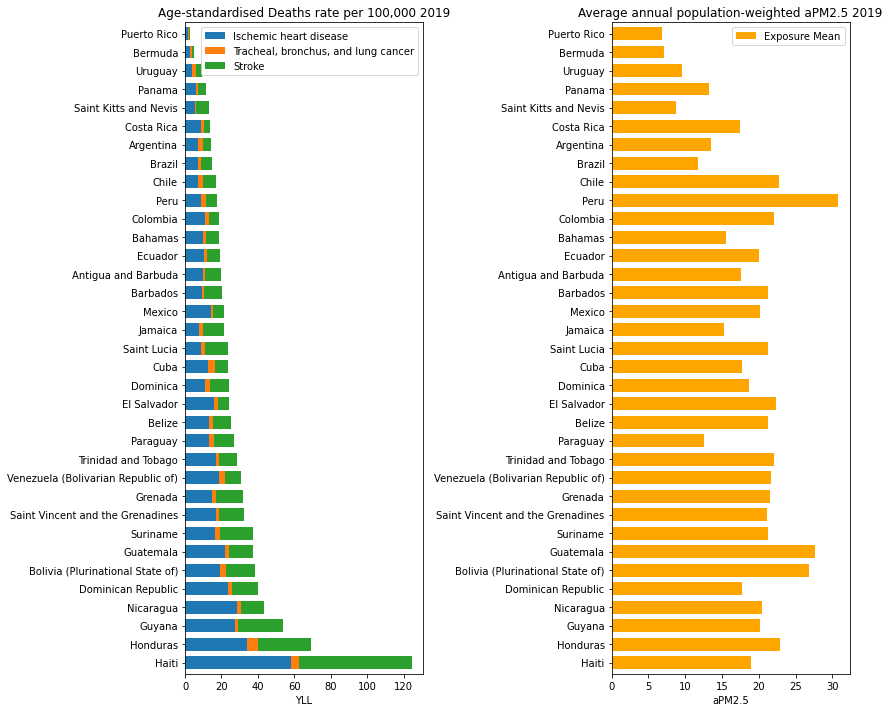

In [15]:
#Igual que plots anterior pero ponemos dos plots en uno mismo

#years of life lost (YLL) 2019
yll_ihd = filtrado_2 (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)
# Agrupar por país y causa, y sumar los valores
df_grouped = yll_ihd.groupby(['Location', 'Cause'])['Value'].sum().unstack()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
# Datos de aPM25
data_pm25_2019 = data_pm[data_pm['Year'] == 2019]
data_pm25_2019 = data_pm25_2019.rename(columns={'Country':"Location"})
# Hacemos un merge pero es solo para ordenar los datos, despues los separamos otra vez
df_grouped_merge = pd.merge(df_grouped, data_pm25_2019, on='Location', how='inner')
# Generamos df por separado para hacer los plots
df_grouped_merge['suma'] = df_grouped_merge['Ischemic heart disease'] + df_grouped_merge['Stroke']+df_grouped_merge['Tracheal, bronchus, and lung cancer']
df_grouped_merge_plot_1 = df_grouped_merge[["Location","Ischemic heart disease", "Tracheal, bronchus, and lung cancer","Stroke"]]
df_grouped_merge_plot_2 = df_grouped_merge[["Location","Exposure Mean"]]
# Establecer la columna "Nombre" como índice
df_grouped_merge_plot_1.set_index('Location', inplace=True)
df_grouped_merge_plot_2.set_index('Location', inplace=True)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
# Graficar en la primera subtrama
df_grouped_merge_plot_1.plot(kind='barh', stacked=True, width=0.7, ax=axes[0])
axes[0].set_title('Age-standardised Deaths rate per 100,000 2019')
axes[0].set_xlabel('YLL')
axes[0].set_ylabel('')
#axes[0].set_ylabel('Eje Y')

# Graficar en la segunda subtrama

df_grouped_merge_plot_2.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
axes[1].set_title('Average annual population-weighted aPM2.5 2019')
axes[1].set_xlabel('aPM2.5')
#axes[1].set_ylabel('Eje Y')
axes[1].set_ylabel('')
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


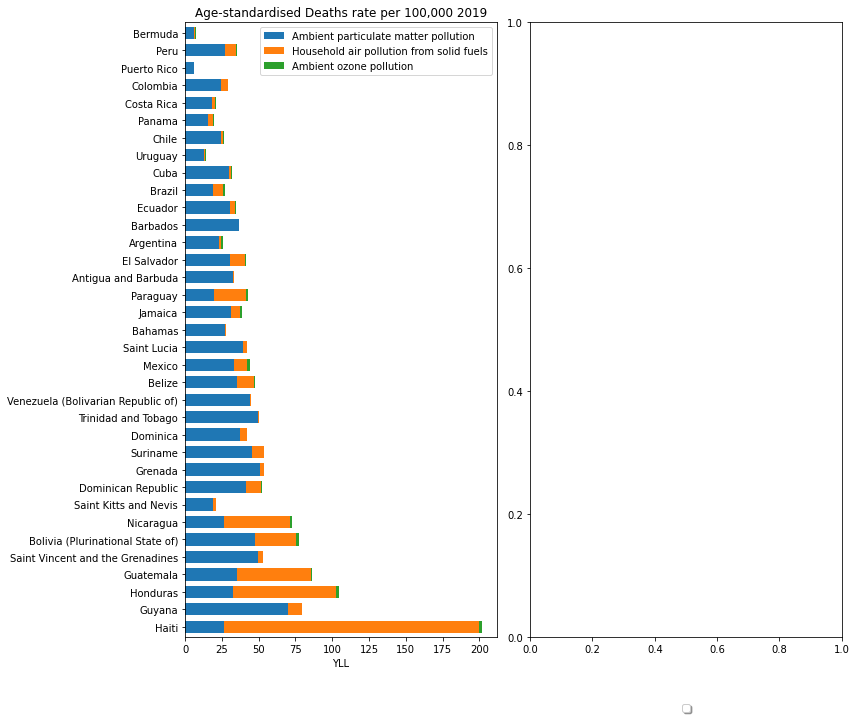

In [30]:
#Igual que plots anterior pero ponemos dos plots en uno mismo

#years of life lost (YLL) 2019
yll_ihd = filtrado_3 (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)
# Agrupar por país y causa, y sumar los valores
df_grouped = yll_ihd.groupby(['Location', 'Risk'])['Value'].sum().unstack()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
# Datos de aPM25
data_pm25_2019 = data_pm[data_pm['Year'] == 2019]
data_pm25_2019 = data_pm25_2019.rename(columns={'Country':"Location"})
# Hacemos un merge pero es solo para ordenar los datos, despues los separamos otra vez
df_grouped_merge = pd.merge(df_grouped, data_pm25_2019, on='Location', how='inner')
df_grouped
# Generamos df por separado para hacer los plots
df_grouped_merge['suma'] = df_grouped_merge['Ambient ozone pollution'] + df_grouped_merge['Household air pollution from solid fuels']+df_grouped_merge['Ambient particulate matter pollution']
df_grouped_merge_plot_1 = df_grouped_merge[["Location","Ambient particulate matter pollution", "Household air pollution from solid fuels","Ambient ozone pollution"]]
df_grouped_merge_plot_2 = df_grouped_merge[["Location","Exposure Mean"]]
# Establecer la columna "Nombre" como índice
df_grouped_merge_plot_1.set_index('Location', inplace=True)
df_grouped_merge_plot_2.set_index('Location', inplace=True)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
# Graficar en la primera subtrama
df_grouped_merge_plot_1.plot(kind='barh', stacked=True, width=0.7, ax=axes[0])
axes[0].set_title('Age-standardised Deaths rate per 100,000 2019')
axes[0].set_xlabel('YLL')
axes[0].set_ylabel('')
#axes[0].set_ylabel('Eje Y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
# Graficar en la segunda subtrama

# df_grouped_merge_plot_2.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
# axes[1].set_title('Average annual population-weighted aPM2.5 2019')
# axes[1].set_xlabel('aPM2.5')
# #axes[1].set_ylabel('Eje Y')
# axes[1].set_ylabel('')
# # Ajustar el diseño
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [20]:
# # Analisis del numero de la tasa de dalys
rate_dalys_air_pol_1990 = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
rate_dalys_air_pol_2019 = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # Union de las tablas de 1990 - 2019 para ser comparadas
rate_dalys_air_pol_2019_sub =rate_dalys_air_pol_2019[["Location","Value"]]
rate_dalys_air_pol_1990_sub = rate_dalys_air_pol_1990[["Location","Value"]]
rate_dalys_air_pol_merge = pd.merge(rate_dalys_air_pol_1990_sub, rate_dalys_air_pol_2019_sub, on='Location', how='inner')
#Cambio de nombres de las columnas
rate_dalys_air_pol_merge = rate_dalys_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Diferencia
rate_dalys_air_pol_merge['difference']  = rate_dalys_air_pol_merge['value_1990'] - rate_dalys_air_pol_merge['value_2019']
# Diferencia porcentual
rate_dalys_air_pol_merge['difference_porc']  = round((((rate_dalys_air_pol_merge['value_1990'] - rate_dalys_air_pol_merge['value_2019'])/rate_dalys_air_pol_merge['value_1990'] )*100),2)
rate_dalys_air_pol_merge

suma_rate_dalys_air_pol_1990 = rate_dalys_air_pol_merge['value_1990'].median()
suma_rate_dalys_air_pol_2019 = rate_dalys_air_pol_merge['value_2019'].median()

print("Tasa de DALYs atribuible a la contaminacion 1990 es ",round(suma_rate_dalys_air_pol_1990,2))
print("Tasa de DALYs atribuible a la contaminacion 2019 es ",round(suma_rate_dalys_air_pol_2019,2))
print("La diferencia de Tasa de DALYs atribuible a la contaminacion entre 1900-2019 es ",round(((suma_rate_dalys_air_pol_1990 - suma_rate_dalys_air_pol_2019)/suma_rate_dalys_air_pol_1990)*100,2))

print(" ------------------------------------------------------------------------- ")
print("La mediana es de:", suma_rate_dalys_air_pol_2019)
paises_superan_media_dalys = rate_dalys_air_pol_2019[rate_dalys_air_pol_2019['Value'] > suma_rate_dalys_air_pol_2019]
print(len(paises_superan_media_dalys))
paises_superan_media_dalys_subs = paises_superan_media_dalys[['Location','Value']]
paises_superan_media_dalys_subs['porc'] = paises_superan_media_dalys['Value'] / suma_rate_dalys_air_pol_2019
paises_superan_media_dalys_subs  = paises_superan_media_dalys_subs.sort_values(by='porc',ascending=True)
paises_superan_media_dalys_subs

Tasa de DALYs atribuible a la contaminacion 1990 es  2158.7
Tasa de DALYs atribuible a la contaminacion 2019 es  1105.77
La diferencia de Tasa de DALYs atribuible a la contaminacion entre 1900-2019 es  48.78
 ------------------------------------------------------------------------- 
La mediana es de: 1105.766718
17


,Location,Value,porc
29903,Bermuda,190.774765,0.172527
30071,Puerto Rico,196.494453,0.177700
20385,Uruguay,360.814634,0.326303
29099,Saint Kitts and Nevis,563.984508,0.510039
20918,Panama,582.115851,0.526436
29055,Costa Rica,599.009979,0.541715
17099,Argentina,628.206430,0.568118
25395,Chile,660.232277,0.597081
16979,Brazil,763.320640,0.690309
18056,Cuba,795.786666,0.719670


<Figure size 720x1440 with 0 Axes>

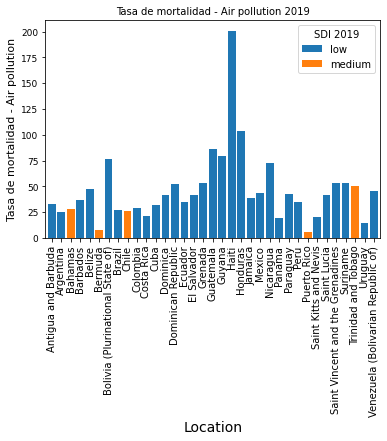

In [25]:
# Tasa de mortalidad de la contaminacion atmosferica segun SDI
sdi = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # # Agrupar por país y causa, y sumar los valores
sdi = sdi.sort_values(by='Value')
sdi_grouped = sdi.groupby(['Location', 'categoria_SDI_2018'])['Value'].sum().unstack()
#sdi_grouped
plt.figure(figsize=(10, 20))
# Crear un gráfico de barras horizontales apiladas
sdi_grouped.plot(kind='bar', stacked=True, width=0.82, label="SDI")
# Agregar etiquetas a los ejes
plt.legend(title="SDI 2019")
plt.ylabel('Tasa de mortalidad - Air pollution', fontsize=11)
plt.xlabel('Location', fontsize=14)
plt.yticks( fontsize=9)
# plt.xlim(0, 3000) 
# Agregar título
plt.title('Tasa de mortalidad - Air pollution 2019', fontsize=10)
# Mostrar el gráfico
plt.show()

<Figure size 720x1440 with 0 Axes>

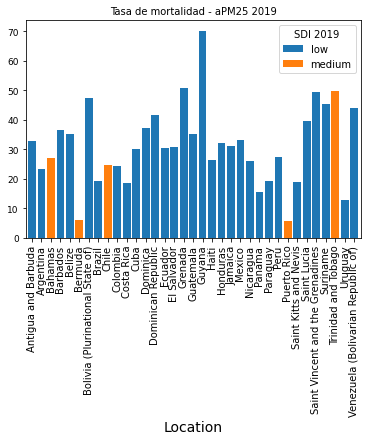

In [27]:
# Tasa de mortalidad de la contaminacion atmosferica segun SDI
sdi = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = "Ambient particulate matter pollution", Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # # Agrupar por país y causa, y sumar los valores
sdi = sdi.sort_values(by='Value')
sdi_grouped = sdi.groupby(['Location', 'categoria_SDI_2018'])['Value'].sum().unstack()
#sdi_grouped
plt.figure(figsize=(10, 20))
# Crear un gráfico de barras horizontales apiladas
sdi_grouped.plot(kind='bar', stacked=True, width=0.82, label="SDI")
# Agregar etiquetas a los ejes
plt.legend(title="SDI 2019")
#plt.ylabel('Tasa de mortalidad - Ambient particulate matter pollution', fontsize=11)
plt.xlabel('Location', fontsize=14)
plt.yticks( fontsize=9)
# plt.xlim(0, 3000) 
# Agregar título
plt.title('Tasa de mortalidad - aPM25 2019', fontsize=10)
# Mostrar el gráfico
plt.show()

In [ ]:
# Tasa de mortalidad de la contaminacion atmosferica segun SDI
sdi = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = "Ambient particulate matter pollution", Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # # Agrupar por país y causa, y sumar los valores
sdi = sdi.sort_values(by='Value')
sdi_grouped = sdi.groupby(['Location', 'categoria_SDI_2018'])['Value'].sum().unstack()
#sdi_grouped
plt.figure(figsize=(10, 20))
# Crear un gráfico de barras horizontales apiladas
sdi_grouped.plot(kind='bar', stacked=True, width=0.82, label="SDI")
# Agregar etiquetas a los ejes
plt.legend(title="SDI 2019")
#plt.ylabel('Tasa de mortalidad - Ambient particulate matter pollution', fontsize=11)
plt.xlabel('Location', fontsize=14)
plt.yticks( fontsize=9)
# plt.xlim(0, 3000) 
# Agregar título
plt.title('Tasa de mortalidad - aPM25 2019', fontsize=10)
# Mostrar el gráfico
plt.show()

In [19]:
# Paper 2
#Comparativa por edad y genero

# Estadisticas por genero-edad - numero de muertes
Measure = "Deaths"
Metric = 'Number'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_apm = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores. Sumamos los valores de todos los paises
df_filtrado_grouped_apm = df_filtrado_apm.groupby(['Age','Sex'])['Value'].sum().unstack()
# df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
df_filtrado_grouped_apm.index
###############################

# Estadisticas por genero-edad - numero de muertes
Measure = "Deaths"
Metric = 'Rate'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_rate_apm = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_rate_apm = df_filtrado_rate_apm.groupby(['Age','Sex'])['Value'].sum().unstack()
df_filtrado_grouped_rate_apm
df_filtrado_grouped_apm



Sex,Female,Male
Age,,
0-4 years,2460.223927,3263.307405
10-14 years,37.195129,40.580000
15-19 years,39.690000,55.390000
20-24 years,50.910000,77.710000
25-29 years,340.460000,612.160000
30-34 years,498.000000,945.730000
35-39 years,796.390000,1447.400000
40-44 years,1289.800000,2267.060000
45-49 years,2040.080000,3587.130000


In [20]:
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_apm.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_apm = df_filtrado_grouped_apm.sort_values(by='index2') 

###################################################################
###################################################################
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_apm.index:
    df_filtrado_grouped_rate_apm.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_rate_apm.index:
    df_filtrado_grouped_rate_apm.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_rate_apm = df_filtrado_grouped_rate_apm.sort_values(by='index2') 
df_filtrado_grouped_rate_apm

Sex,Female,Male,index2
Age,,,
0-4 years,348.378299,428.495066,1.0
5-9 years,6.220000,6.560000,2.0
10-14 years,4.840000,4.850000,3.0
15-19 years,5.050000,6.660000,4.0
20-24 years,6.590000,9.380000,5.0
25-29 years,48.510000,79.420000,6.0
30-34 years,78.560000,139.890000,7.0
35-39 years,128.710000,231.470000,8.0
40-44 years,230.460000,409.900000,9.0


In [21]:
# proporcion de hombres y mujeres del total
df_filtrado_grouped_rate_apm["tot"] = df_filtrado_grouped_rate_apm["Female"] + df_filtrado_grouped_rate_apm["Male"] 
df_filtrado_grouped_rate_apm["%Fem"] = round((df_filtrado_grouped_rate_apm["Female"] / df_filtrado_grouped_rate_apm["tot"])*100,2)
df_filtrado_grouped_rate_apm["%Male"] = round((df_filtrado_grouped_rate_apm["Male"] / df_filtrado_grouped_rate_apm["tot"])*100,2)
df_filtrado_grouped_rate_apm["resta"] = df_filtrado_grouped_rate_apm["%Male"]- df_filtrado_grouped_rate_apm["%Fem"] 
df_filtrado_grouped_rate_apm
# #Diferencia minima

print("------------------ Diferencia minima ------------------")
print(df_filtrado_grouped_rate_apm[df_filtrado_grouped_rate_apm['resta']==df_filtrado_grouped_rate_apm['resta'].min()])
#Difrencia maxima
print("------------------ Diferencia maxima ------------------")
print(df_filtrado_grouped_rate_apm[df_filtrado_grouped_rate_apm['resta']==df_filtrado_grouped_rate_apm['resta'].max()])

print("------------------ Diferencia promedio ------------------")
print(round(df_filtrado_grouped_rate_apm['resta'].mean(),2))

------------------ Diferencia minima ------------------
Sex          Female  Male  index2   tot   %Fem  %Male  resta
Age                                                         
10-14 years    4.84  4.85     3.0  9.69  49.95  50.05    0.1
------------------ Diferencia maxima ------------------
Sex           Female     Male  index2      tot   %Fem  %Male  resta
Age                                                                
55-59 years  1184.99  2176.09    12.0  3361.08  35.26  64.74  29.48
------------------ Diferencia promedio ------------------
17.53


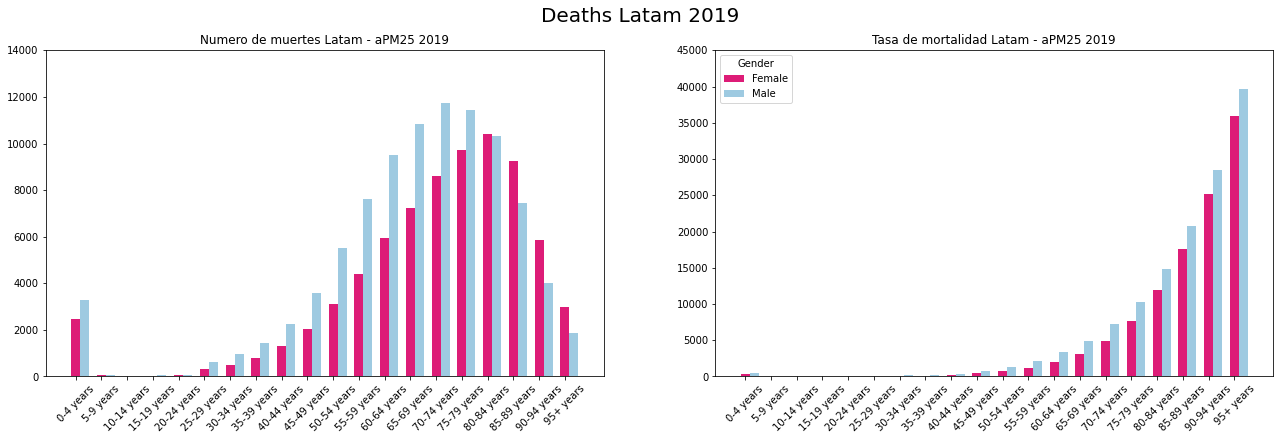

In [41]:
#Fig. 1. Age-specific numbers (bar plot) and rates (line plot) of deaths (A) and DALYs (B) attributable to ambient PM2.5 in 2019 by sex. DALY, disability-adjusted
#life year.
#Hacemos plot
# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(22,6))#ancho y alto
plt.suptitle("Deaths Latam 2019", fontsize=20)
bar_width = 0.35
bar_positions1 = range(len(df_filtrado_grouped_apm['Female']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax[0].bar(df_filtrado_grouped_apm.index, df_filtrado_grouped_apm['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[0].bar(bar_positions2, df_filtrado_grouped_apm['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')

ax[1].bar(df_filtrado_grouped_rate_apm.index, df_filtrado_grouped_rate_apm['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[1].bar(bar_positions2, df_filtrado_grouped_rate_apm['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')


#Ticks x
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

ax[0].set_yticks(range(0, 15000, 2000))
ax[1].set_yticks(range(0, 46000, 5000))
# ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# titulo subplots

ax[0].set_title('Numero de muertes Latam - aPM25 2019')
ax[1].set_title('Tasa de mortalidad Latam - aPM25 2019')
# Mostrar el gráfico
plt.legend(title="Gender")
plt.show()

In [27]:
# Estadisticas por genero-edad - numero de muertes
Measure = "DALYs"
Metric = 'Number'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_dalys_apm = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_dalys_apm = df_filtrado_dalys_apm.groupby(['Age','Sex'])['Value'].sum().unstack()
# df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
df_filtrado_grouped_dalys_apm.index
###############################

# Estadisticas por genero-edad - numero de muertes
Measure = "DALYs"
Metric = 'Rate'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_rate_dalys_apm = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_rate_dalys_apm = df_filtrado_rate_dalys_apm.groupby(['Age','Sex'])['Value'].sum().unstack()
df_filtrado_grouped_rate_dalys_apm.index
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_dalys_apm.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_dalys_apm = df_filtrado_grouped_dalys_apm.sort_values(by='index2') 

###################################################################
###################################################################
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_rate_dalys_apm.index:
    df_filtrado_grouped_rate_dalys_apm.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_rate_dalys_apm = df_filtrado_grouped_rate_dalys_apm.sort_values(by='index2') 
df_filtrado_grouped_dalys_apm


Sex,Female,Male,index2
Age,,,
0-4 years,218377.820935,289707.640169,1.0
5-9 years,4174.430000,4701.430000,2.0
10-14 years,2920.710000,3195.880000,3.0
15-19 years,2887.950000,4023.430000,4.0
20-24 years,3429.230000,5237.040000,5.0
25-29 years,28979.310000,44204.440000,6.0
30-34 years,39104.800000,62794.450000,7.0
35-39 years,56212.750000,88417.650000,8.0
40-44 years,80388.980000,125438.780000,9.0


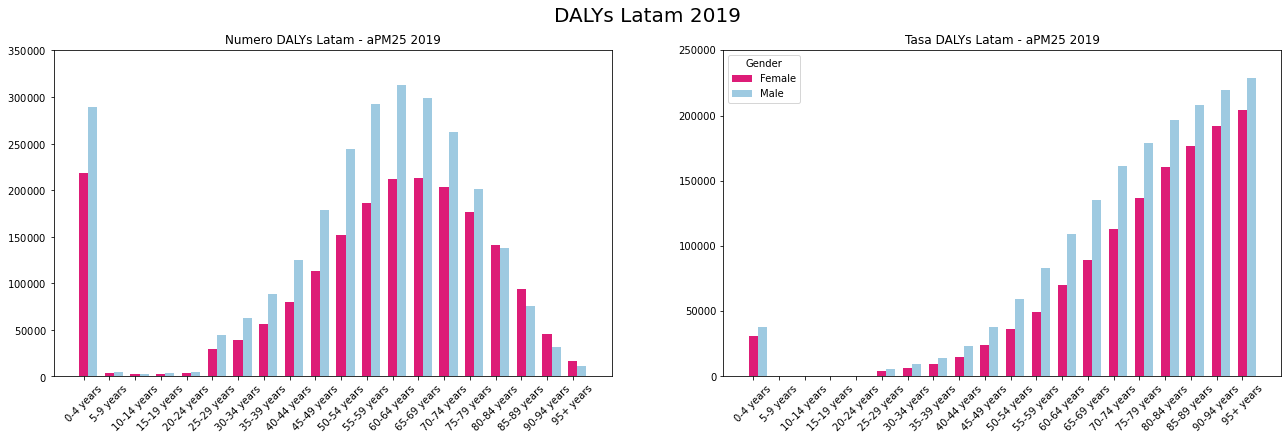

Sex,Female,Male,index2
Age,,,
0-4 years,30937.5787,38051.771108,1.0
5-9 years,530.0600,558.100000,2.0
10-14 years,377.3400,385.140000,3.0
15-19 years,368.3600,484.520000,4.0
20-24 years,443.8700,632.300000,5.0
25-29 years,4251.1000,5899.590000,6.0
30-34 years,6265.3400,9461.220000,7.0
35-39 years,9267.9100,14384.190000,8.0
40-44 years,14570.0800,22992.820000,9.0


In [40]:
#Fig. 1. Age-specific numbers (bar plot) and rates (line plot) of deaths (A) and DALYs (B) attributable to ambient PM2.5 in 2019 by sex. DALY, disability-adjusted
#life year.
#Hacemos plot
# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(22,6))#ancho y alto
plt.suptitle("DALYs Latam 2019", fontsize=20)
bar_width = 0.35
bar_positions1 = range(len(df_filtrado_grouped_dalys_apm['Female']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax[0].bar(df_filtrado_grouped_dalys_apm.index, df_filtrado_grouped_dalys_apm['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[0].bar(bar_positions2, df_filtrado_grouped_dalys_apm['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')

ax[1].bar(df_filtrado_grouped_rate_dalys_apm.index, df_filtrado_grouped_rate_dalys_apm['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[1].bar(bar_positions2, df_filtrado_grouped_rate_dalys_apm['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')


#Ticks x
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

ax[0].set_yticks(range(0, 360000, 50000))
ax[1].set_yticks(range(0, 300000, 50000))
ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# titulo subplots

ax[0].set_title('Numero DALYs Latam - aPM25 2019')
ax[1].set_title('Tasa DALYs Latam - aPM25 2019')
# Mostrar el gráfico
plt.legend(title="Gender")
plt.show()
df_filtrado_grouped_rate_dalys_apm

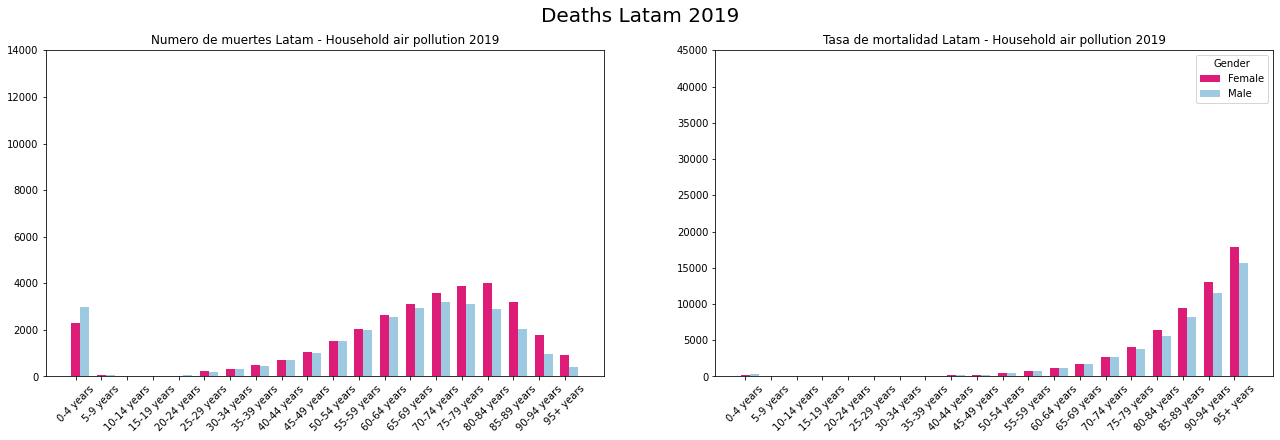

------------------ Diferencia minima ------------------
Sex          Female   Male  index2    tot   %Fem  %Male  resta
Age                                                           
25-29 years   31.33  26.11     6.0  57.44  54.54  45.46  -9.08
------------------ Diferencia maxima ------------------
Sex            Female        Male  index2         tot   %Fem  %Male  resta
Age                                                                       
0-4 years  270.636879  339.528194     1.0  610.165073  44.35  55.65   11.3
------------------ Diferencia promedio ------------------
-1.98


In [39]:
# Paper 2
#Comparativa por edad y genero pero de contaminantes interior

# Estadisticas por genero-edad - numero de muertes
Measure = "Deaths"
Metric = 'Number'
Risk = 'Household air pollution from solid fuels'
Cause = "All causes"
Year = 2019

df_filtrado_house = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores. Sumamos los valores de todos los paises
df_filtrado_grouped_house = df_filtrado_house.groupby(['Age','Sex'])['Value'].sum().unstack()
# df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
df_filtrado_grouped_house.index
###############################

# Estadisticas por genero-edad - numero de muertes
Measure = "Deaths"
Metric = 'Rate'
Risk = 'Household air pollution from solid fuels'
Cause = "All causes"
Year = 2019

df_filtrado_rate_house = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_rate_house = df_filtrado_rate_house.groupby(['Age','Sex'])['Value'].sum().unstack()
df_filtrado_grouped_rate_house
df_filtrado_grouped_house
##############
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_house.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_house = df_filtrado_grouped_house.sort_values(by='index2') 

###################################################################
###################################################################
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_house.index:
    df_filtrado_grouped_rate_house.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_rate_house.index:
    df_filtrado_grouped_rate_house.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_rate_house = df_filtrado_grouped_rate_house.sort_values(by='index2') 
df_filtrado_grouped_rate_house

#Fig. 1. Age-specific numbers (bar plot) and rates (line plot) of deaths (A) and DALYs (B) attributable to ambient PM2.5 in 2019 by sex. DALY, disability-adjusted
#life year.
#Hacemos plot
# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(22,6))#ancho y alto
plt.suptitle("Deaths Latam 2019", fontsize=20)
bar_width = 0.35
bar_positions1 = range(len(df_filtrado_grouped_house['Female']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax[0].bar(df_filtrado_grouped_house.index, df_filtrado_grouped_house['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[0].bar(bar_positions2, df_filtrado_grouped_house['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')

ax[1].bar(df_filtrado_grouped_rate_house.index, df_filtrado_grouped_rate_house['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[1].bar(bar_positions2, df_filtrado_grouped_rate_house['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')


#Ticks x
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[0].set_yticks(range(0, 15000, 2000))
ax[1].set_yticks(range(0, 46000, 5000))
# ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# titulo subplots

ax[0].set_title('Numero de muertes Latam - Household air pollution 2019')
ax[1].set_title('Tasa de mortalidad Latam - Household air pollution 2019')
# Mostrar el gráfico
plt.legend(title="Gender")
plt.show()
# proporcion de hombres y mujeres del total
df_filtrado_grouped_rate_house["tot"] = df_filtrado_grouped_rate_house["Female"] + df_filtrado_grouped_rate_house["Male"] 
df_filtrado_grouped_rate_house["%Fem"] = round((df_filtrado_grouped_rate_house["Female"] / df_filtrado_grouped_rate_house["tot"])*100,2)
df_filtrado_grouped_rate_house["%Male"] = round((df_filtrado_grouped_rate_house["Male"] / df_filtrado_grouped_rate_house["tot"])*100,2)
df_filtrado_grouped_rate_house["resta"] = df_filtrado_grouped_rate_house["%Male"]- df_filtrado_grouped_rate_house["%Fem"] 
df_filtrado_grouped_rate_house
# #Diferencia minima

print("------------------ Diferencia minima ------------------")
print(df_filtrado_grouped_rate_house[df_filtrado_grouped_rate_house['resta']==df_filtrado_grouped_rate_house['resta'].min()])
#Difrencia maxima
print("------------------ Diferencia maxima ------------------")
print(df_filtrado_grouped_rate_house[df_filtrado_grouped_rate_house['resta']==df_filtrado_grouped_rate_house['resta'].max()])

print("------------------ Diferencia promedio ------------------")
print(round(df_filtrado_grouped_rate_house['resta'].mean(),2))

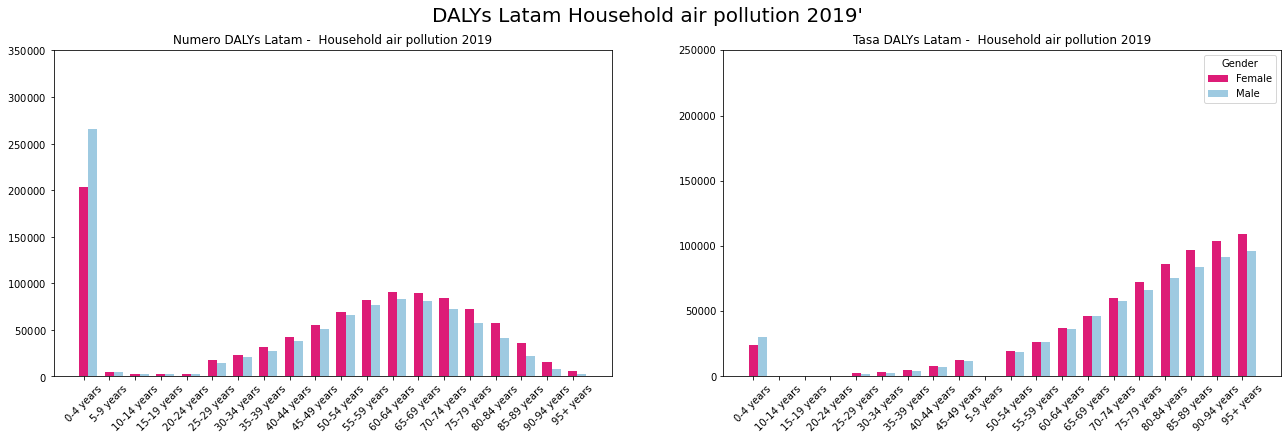

------------------ Diferencia minima tasa de DALYs ------------------
Sex          Female    Male  index2     tot   %Fem  %Male  resta
Age                                                             
25-29 years  2418.2  1890.7     6.0  4308.9  56.12   0.61 -55.51
------------------ Diferencia maxima tasa de DALYs ------------------
Sex              Female          Male  index2          tot   %Fem  %Male  \
Age                                                                        
0-4 years  23966.634115  30072.348995     1.0  54038.98311  44.35   0.63   

Sex        resta  
Age               
0-4 years -43.72  
------------------ Diferencia promedio tasa de DALYs ------------------
-49.55
------------------ Diferencia minima de DALYs ------------------
Sex         Female     Male  index2      tot  %Fem  %Male  resta
Age                                                             
95+ years  5894.01  2812.45    20.0  8706.46  67.7   32.3  -35.4
------------------ Diferencia maxima DAL

188983.527151577

In [58]:
# Estadisticas por genero-edad - numero de muertes
Measure = "DALYs"
Metric = 'Number'
Risk = 'Household air pollution from solid fuels'
Cause = "All causes"
Year = 2019

df_filtrado_dalys_house = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_dalys_house = df_filtrado_dalys_house.groupby(['Age','Sex'])['Value'].sum().unstack()
# df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
df_filtrado_grouped_dalys_house.index
###############################

# Estadisticas por genero-edad - numero de muertes
Measure = "DALYs"
Metric = 'Rate'
Risk = 'Household air pollution from solid fuels'
Cause = "All causes"
Year = 2019

df_filtrado_rate_dalys_house = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_rate_dalys_house = df_filtrado_rate_dalys_house.groupby(['Age','Sex'])['Value'].sum().unstack()
df_filtrado_grouped_rate_dalys_house.index
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_dalys_house.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_dalys_house = df_filtrado_grouped_dalys_house.sort_values(by='index2') 

###################################################################
###################################################################
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_rate_dalys_house.index:
    df_filtrado_grouped_rate_dalys_house.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_rate_dalys = df_filtrado_grouped_rate_dalys_house.sort_values(by='index2') 
df_filtrado_grouped_dalys_house
######################################################################################################
#Fig. 1. Age-specific numbers (bar plot) and rates (line plot) of deaths (A) and DALYs (B) attributable to ambient PM2.5 in 2019 by sex. DALY, disability-adjusted
#life year.
#Hacemos plot
# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(22,6))#ancho y alto
plt.suptitle("DALYs Latam Household air pollution 2019'", fontsize=20)
bar_width = 0.35
bar_positions1 = range(len(df_filtrado_grouped_dalys_house['Female']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax[0].bar(df_filtrado_grouped_dalys_house.index, df_filtrado_grouped_dalys_house['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[0].bar(bar_positions2, df_filtrado_grouped_dalys_house['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')

ax[1].bar(df_filtrado_grouped_rate_dalys_house.index, df_filtrado_grouped_rate_dalys_house['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[1].bar(bar_positions2, df_filtrado_grouped_rate_dalys_house['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')


#Ticks x
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[0].set_yticks(range(0, 360000, 50000))
ax[1].set_yticks(range(0, 300000, 50000))
ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# titulo subplots

ax[0].set_title('Numero DALYs Latam -  Household air pollution 2019')
ax[1].set_title('Tasa DALYs Latam -  Household air pollution 2019')
# Mostrar el gráfico
plt.legend(title="Gender")
plt.show()

# proporcion de hombres y mujeres del total
df_filtrado_grouped_rate_dalys_house["tot"] = df_filtrado_grouped_rate_dalys_house["Female"] + df_filtrado_grouped_rate_dalys_house["Male"] 
df_filtrado_grouped_rate_dalys_house["%Fem"] = round((df_filtrado_grouped_rate_dalys_house["Female"] / df_filtrado_grouped_rate_dalys_house["tot"])*100,2)
df_filtrado_grouped_rate_dalys_house["%Male"] = round((df_filtrado_grouped_rate_house["Male"] / df_filtrado_grouped_rate_dalys_house["tot"])*100,2)
df_filtrado_grouped_rate_dalys_house["resta"] = df_filtrado_grouped_rate_dalys_house["%Male"]- df_filtrado_grouped_rate_dalys_house["%Fem"] 
df_filtrado_grouped_rate_dalys_house


df_filtrado_grouped_dalys_house["tot"] = df_filtrado_grouped_dalys_house["Female"] + df_filtrado_grouped_dalys_house["Male"] 
df_filtrado_grouped_dalys_house["%Fem"] = round((df_filtrado_grouped_dalys_house["Female"] / df_filtrado_grouped_dalys_house["tot"])*100,2)
df_filtrado_grouped_dalys_house["%Male"] = round((df_filtrado_grouped_dalys_house["Male"] / df_filtrado_grouped_dalys_house["tot"])*100,2)
df_filtrado_grouped_dalys_house["resta"] = df_filtrado_grouped_dalys_house["%Male"]- df_filtrado_grouped_dalys_house["%Fem"] 
df_filtrado_grouped_dalys_house
# #Diferencia minima

print("------------------ Diferencia minima tasa de DALYs ------------------")
print(df_filtrado_grouped_rate_dalys_house[df_filtrado_grouped_rate_dalys_house['resta']==df_filtrado_grouped_rate_dalys_house['resta'].min()])
#Difrencia maxima
print("------------------ Diferencia maxima tasa de DALYs ------------------")
print(df_filtrado_grouped_rate_dalys_house[df_filtrado_grouped_rate_dalys_house['resta']==df_filtrado_grouped_rate_dalys_house['resta'].max()])

print("------------------ Diferencia promedio tasa de DALYs ------------------")
print(round(df_filtrado_grouped_rate_dalys_house['resta'].mean(),2))

print("------------------ Diferencia minima de DALYs ------------------")
print(df_filtrado_grouped_dalys_house[df_filtrado_grouped_dalys_house['resta']==df_filtrado_grouped_dalys_house['resta'].min()])
#Difrencia maxima
print("------------------ Diferencia maxima DALYs ------------------")
print(df_filtrado_grouped_dalys_house[df_filtrado_grouped_dalys_house['resta']==df_filtrado_grouped_dalys_house['resta'].max()])

print("------------------ Diferencia promedio DALYs ------------------")
print(round(df_filtrado_grouped_dalys_house['resta'].mean(),2))


df_filtrado_grouped_dalys_house['Female'][0] - df_filtrado_grouped_dalys_house['Female'][11]
df_filtrado_grouped_dalys_house['Male'][0] - df_filtrado_grouped_dalys_house['Male'][11]

In [ ]:
55-59 years	81729.440000
89641.11